# YoussNiss Model - Custom CNN for Diabetic Retinopathy Detection

done by : ELGARCH youssef and IBNOU-KADY Nisrine

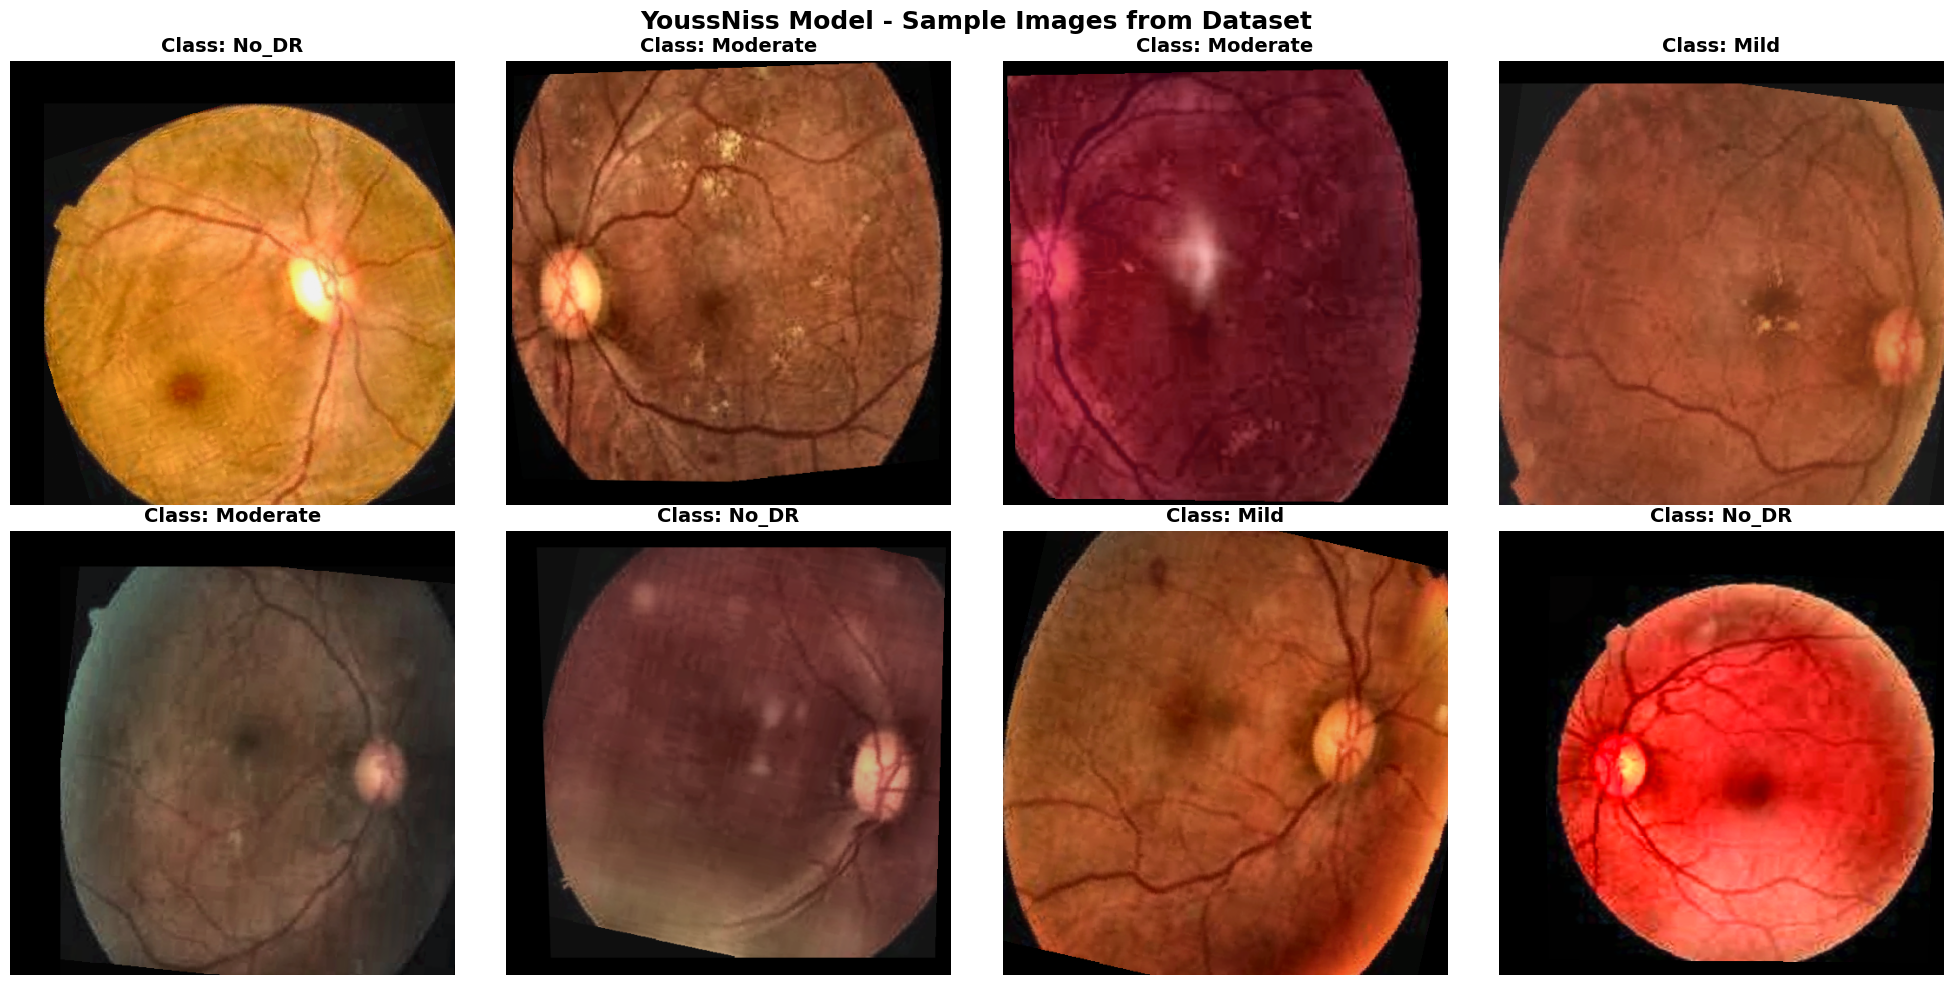

In [ ]:
# ========== CELL 11: Visualize Sample Images ==========
def visualize_samples(data_loader, label_names, num_samples=8):
    dataiter = iter(data_loader)
    images, labels = next(dataiter)

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()

    for i in range(min(num_samples, len(images))):
        image = images[i]
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        image = image * std + mean
        image = torch.clamp(image, 0, 1)

        image_np = image.permute(1, 2, 0).numpy()

        axes[i].imshow(image_np)
        axes[i].set_title(f'Class: {label_names[labels[i]]}', fontsize=14, fontweight='bold')
        axes[i].axis('off')

    plt.suptitle('YoussNiss Model - Sample Images from Dataset', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualize samples
visualize_samples(train_loader, label_names)

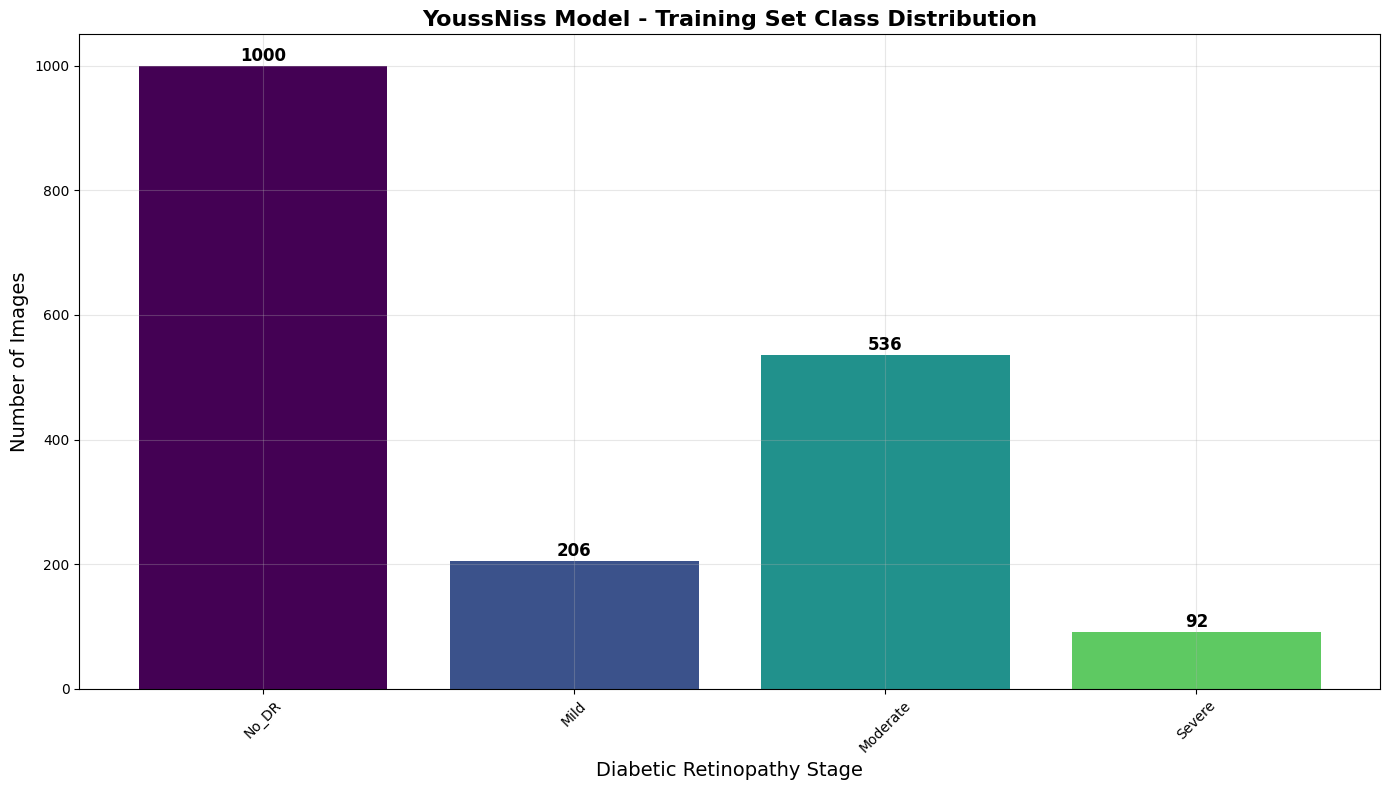


📊 YoussNiss Model - Training Set Class Distribution:
   No_DR: 1000 images (54.5%)
   Mild: 206 images (11.2%)
   Moderate: 536 images (29.2%)
   Severe: 92 images (5.0%)


In [ ]:
# ========== CELL 12: Plot Class Distribution ==========
def plot_class_distribution(data_loader, label_names, title="Class Distribution"):
    all_labels = []
    for _, labels in data_loader:
        all_labels.extend(labels.numpy())

    plt.figure(figsize=(14, 8))
    unique_labels, counts = np.unique(all_labels, return_counts=True)

    colors = plt.cm.viridis(np.linspace(0, 1, len(label_names)))
    bars = plt.bar([label_names[i] for i in unique_labels], counts, color=colors)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Diabetic Retinopathy Stage', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Print statistics
    print(f"\n📊 {title}:")
    for i, count in zip(unique_labels, counts):
        percentage = (count / len(all_labels)) * 100
        print(f"   {label_names[i]}: {count} images ({percentage:.1f}%)")

# Plot class distribution
plot_class_distribution(train_loader, label_names, "YoussNiss Model - Training Set Class Distribution")

In [ ]:

# ========== CELL 1: Install Dependencies ==========
!pip install opencv-python-headless
!pip install scikit-learn
!pip install seaborn
!pip install plotly
!pip install torchviz
!pip install graphviz

import warnings
warnings.filterwarnings('ignore')
print("✅ Dependencies installed successfully!")
print("🎯 Welcome to YoussNiss Model - Advanced Custom CNN for Diabetic Retinopathy")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:

# ========== CELL 2: Import Libraries ==========
import os
import zipfile
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image, ImageEnhance, ExifTags
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, recall_score, f1_score
import cv2
from google.colab import files, drive
import seaborn as sns
from collections import Counter
import torch.nn.functional as F
import random
from torchviz import make_dot
import io
import base64

print("✅ All libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

✅ All libraries imported successfully!
PyTorch version: 2.6.0+cu124
CUDA available: False


In [ ]:
# ========== CELL 4: Load Preprocessed Dataset ==========
print("📁 Loading preprocessed diabetic retinopathy dataset...")
print("Option 1: Upload zip file of your dataset")
print("Option 2: Use preprocessed folders from preprocessing pipeline")

# Option 1: Upload dataset
try:
    uploaded = files.upload()
    if uploaded:
        zip_filename = list(uploaded.keys())[0]
        print(f"📦 Extracting {zip_filename}...")

        with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
            zip_ref.extractall('/content/diabetic_retinopathy_data')

        print("✅ Dataset extracted to: /content/diabetic_retinopathy_data")
        base_data_path = '/content/diabetic_retinopathy_data'
except:
    # Option 2: Use existing preprocessed data
    print("📂 Looking for existing preprocessed data...")
    if os.path.exists('/content/processed_dataset'):
        base_data_path = '/content/processed_dataset/04_clahe_enhanced'  # Use CLAHE enhanced
        print(f"✅ Using preprocessed data: {base_data_path}")
    else:
        print("⚠️ No data found. Please upload dataset or run preprocessing pipeline first.")
        base_data_path = '/content/diabetic_retinopathy_data'

📁 Loading preprocessed diabetic retinopathy dataset...
Option 1: Upload zip file of your dataset
Option 2: Use preprocessed folders from preprocessing pipeline


Saving Retinopathy (1).zip to Retinopathy (1).zip
📦 Extracting Retinopathy (1).zip...
✅ Dataset extracted to: /content/diabetic_retinopathy_data


In [ ]:
# ========== CELL 5: Advanced Dataset Preprocessing Functions ==========
def extract_zip_file(zip_path, extract_path):
    """Extract ZIP files"""
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extraction completed.")

def organize_images(src_folder, dest_folders, categories):
    """Organize images into categories - FIXED VERSION"""
    for category, count in categories.items():
        category_path = os.path.join(src_folder, category)
        if os.path.exists(category_path):
            dest_category_path = dest_folders.get(category, os.path.join(src_folder, 'organized', category))

            # Create destination directory
            if not os.path.exists(dest_category_path):
                os.makedirs(dest_category_path)

            # Copy images to destination
            copied_count = 0
            for file_name in os.listdir(category_path):
                if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):
                    src_file = os.path.join(category_path, file_name)
                    dest_file = os.path.join(dest_category_path, file_name)

                    # Verify image can be read
                    img_array = cv2.imread(src_file)
                    if img_array is not None:
                        shutil.copy2(src_file, dest_file)
                        copied_count += 1

            print(f"📁 {category}: {copied_count} images organized")

def enhance_contrast_image(src_folder, dst_folder, contrast_factor):
    """Function to adjust image contrast using EXIF metadata"""
    for root, dirs, files in os.walk(src_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                src_path = os.path.join(root, file)
                img = Image.open(src_path)

                # Adjust contrast
                enhancer = ImageEnhance.Contrast(img)
                enhanced_img = enhancer.enhance(contrast_factor)

                # Create destination path
                rel_path = os.path.relpath(src_path, src_folder)
                dst_path = os.path.join(dst_folder, rel_path)
                os.makedirs(os.path.dirname(dst_path), exist_ok=True)

                enhanced_img.save(dst_path)

def convert_to_grayscale(src_folder, dst_folder):
    """Convert images to grayscale"""
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)

    for root, dirs, files in os.walk(src_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                src_path = os.path.join(root, file)

                # Load and convert to grayscale
                img = cv2.imread(src_path)
                if img is not None:
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # Create destination path
                    rel_path = os.path.relpath(src_path, src_folder)
                    dst_path = os.path.join(dst_folder, rel_path)
                    os.makedirs(os.path.dirname(dst_path), exist_ok=True)

                    cv2.imwrite(dst_path, gray_img)

def adjust_image_orientation(image):
    """Adjust image orientation using EXIF data"""
    if hasattr(image, '_getexif'):
        exif = image._getexif()
        if exif is not None:
            for tag, value in exif.items():
                if tag in [274, 'Orientation']:  # Orientation tag
                    if value == 3:
                        image = image.rotate(180, expand=True)
                    elif value == 6:
                        image = image.rotate(270, expand=True)
                    elif value == 8:
                        image = image.rotate(90, expand=True)
                    break
    return image

print("✅ Preprocessing functions defined!")

✅ Preprocessing functions defined!


🚀 Starting dataset organization...
🔍 Scanning directory: /content/diabetic_retinopathy_data

✅ Found 2838 images
📊 Basic class distribution: Counter({0: 1636, 2: 768, 1: 303, 3: 131})
🏷️ Classes: ['No_DR', 'Mild', 'Moderate', 'Severe']

🔍 DATASET VALIDATION REPORT
✅ All categories present

📊 CLASS DISTRIBUTION:
  0 (No_DR): 1636 images
  1 (Mild): 303 images
  2 (Moderate): 768 images
  3 (Severe): 131 images
⚠️ SEVERE CLASS IMBALANCE detected (ratio: 12.5:1)


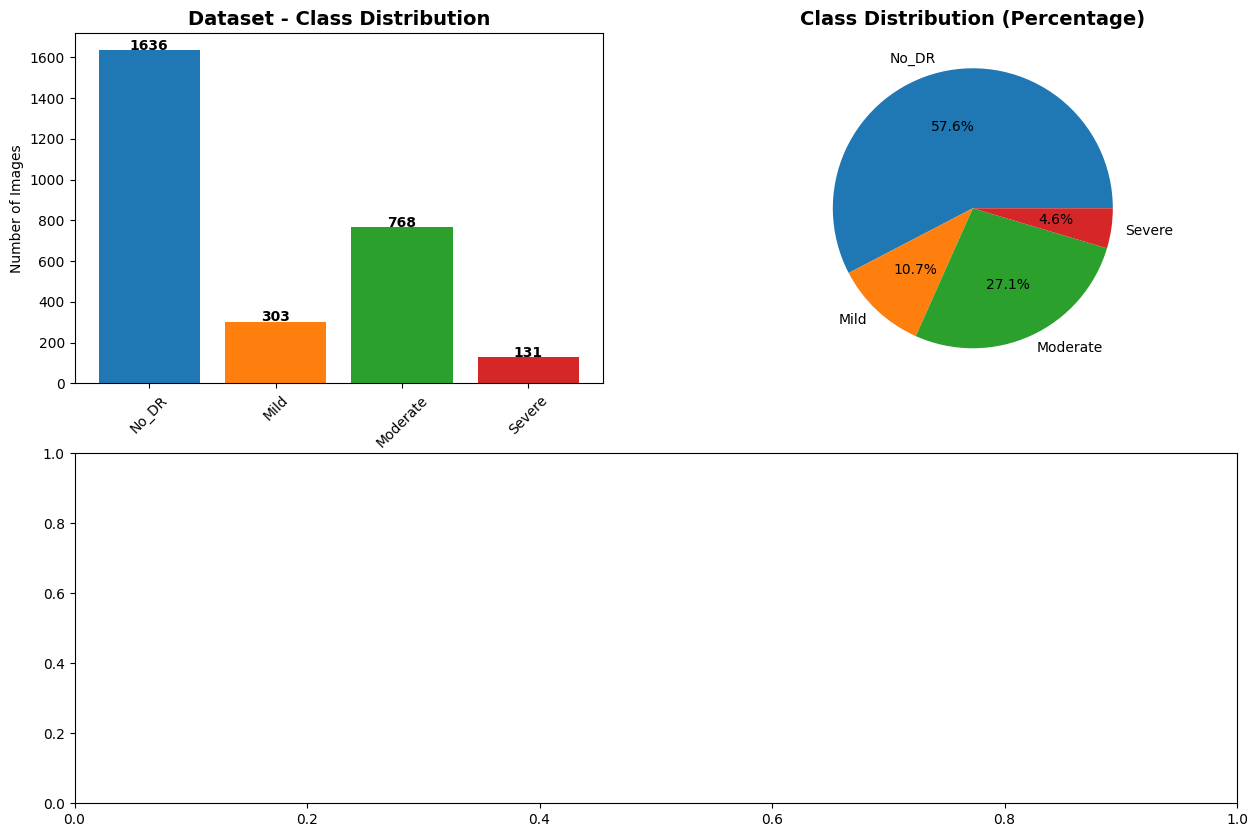

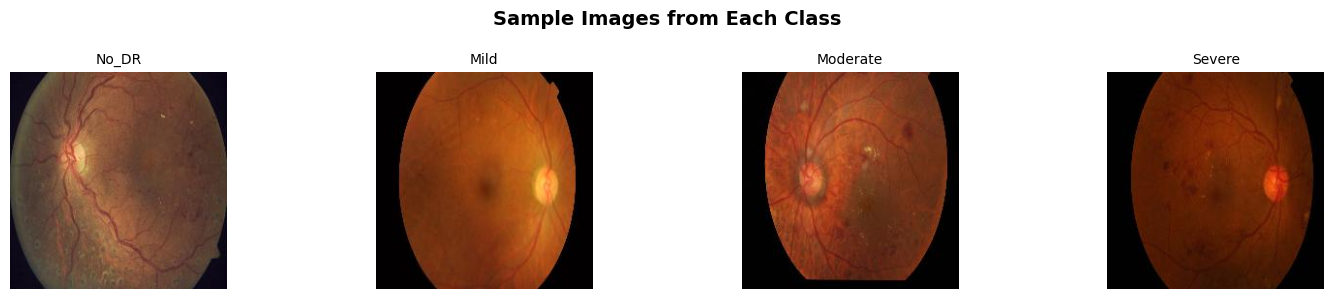


🎯 DATASET ORGANIZATION COMPLETE
📊 Total images: 2838
🏷️ Classes found: 4/4
⚠️ Missing categories: 0


In [ ]:
# ========== CELL 6: IMPROVED Dataset Organization and Loading ==========
def organize_dataset(base_path):
    """Organize dataset from folder structure - IMPROVED VERSION"""
    image_paths = []
    labels = []
    label_names = ['No_DR', 'Mild', 'Moderate', 'Severe']

    # Create mapping dictionaries for more robust matching
    label_mapping = {
        0: ['no_dr', 'no dr', 'normal', '0', 'class_0', 'class0'],
        1: ['mild', '1', 'class_1', 'class1'],
        2: ['moderate', '2', 'class_2', 'class2'],
        3: ['severe', '3', 'class_3', 'class3']
    }

    # Reverse mapping for easy lookup
    keyword_to_label = {}
    for label_idx, keywords in label_mapping.items():
        for keyword in keywords:
            keyword_to_label[keyword.lower()] = label_idx

    print(f"🔍 Scanning directory: {base_path}")

    # Walk through all directories and files
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                folder_name = os.path.basename(root).lower()
                file_name = file.lower()

                label = -1

                # Method 1: Check folder name against keywords
                for keyword, label_idx in keyword_to_label.items():
                    if keyword in folder_name:
                        label = label_idx
                        break

                # Method 2: If no match, check filename
                if label == -1:
                    for keyword, label_idx in keyword_to_label.items():
                        if keyword in file_name:
                            label = label_idx
                            break

                # Method 3: Check for numeric patterns in folder/file
                if label == -1:
                    # Extract numbers from folder name
                    import re
                    numbers = re.findall(r'\d+', folder_name)
                    if numbers:
                        num = int(numbers[0])
                        if 0 <= num <= 4:
                            label = num

                # Method 4: Default assignment based on folder hierarchy
                if label == -1:
                    # Split path and check each component
                    path_components = file_path.lower().split(os.sep)
                    for component in path_components:
                        for keyword, label_idx in keyword_to_label.items():
                            if keyword in component:
                                label = label_idx
                                break
                        if label != -1:
                            break

                # Final fallback: assign to No_DR
                if label == -1:
                    label = 0
                    print(f"⚠️ Unclassified file assigned to No_DR: {file_path}")

                image_paths.append(file_path)
                labels.append(label)

    return image_paths, labels, label_names

def validate_dataset(image_paths, labels, label_names):
    """Validate dataset and report missing categories"""
    print("\n🔍 DATASET VALIDATION REPORT")
    print("=" * 50)

    # Check for missing categories
    unique_labels = set(labels)
    missing_categories = []

    for i in range(len(label_names)):
        if i not in unique_labels:
            missing_categories.append(f"{i}: {label_names[i]}")

    if missing_categories:
        print(f"⚠️ MISSING CATEGORIES: {missing_categories}")
    else:
        print("✅ All categories present")

    # Class distribution
    label_counts = Counter(labels)
    print(f"\n📊 CLASS DISTRIBUTION:")
    for i in sorted(label_counts.keys()):
        print(f"  {i} ({label_names[i]}): {label_counts[i]} images")

    # Check for class imbalance
    if label_counts:
        max_count = max(label_counts.values())
        min_count = min(label_counts.values())
        imbalance_ratio = max_count / min_count if min_count > 0 else float('inf')

        if imbalance_ratio > 10:
            print(f"⚠️ SEVERE CLASS IMBALANCE detected (ratio: {imbalance_ratio:.1f}:1)")
        elif imbalance_ratio > 3:
            print(f"⚠️ Class imbalance detected (ratio: {imbalance_ratio:.1f}:1)")
        else:
            print(f"✅ Balanced dataset (ratio: {imbalance_ratio:.1f}:1)")

    return missing_categories

# Organize the dataset
print("🚀 Starting dataset organization...")
image_paths, labels, label_names = organize_dataset(base_data_path)

print(f"\n✅ Found {len(image_paths)} images")
print("📊 Basic class distribution:", Counter(labels))
print("🏷️ Classes:", label_names)

# Validate the dataset
missing_categories = validate_dataset(image_paths, labels, label_names)

# Enhanced visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Class distribution
plt.subplot(2, 2, 1)
label_counts = Counter(labels)
classes = [label_names[i] for i in sorted(label_counts.keys())]
counts = [label_counts[i] for i in sorted(label_counts.keys())]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

bars = plt.bar(classes, counts, color=colors[:len(classes)])
plt.title('Dataset - Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Diabetic Retinopathy Stages')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, counts)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', fontweight='bold')

# Subplot 2: Pie chart
plt.subplot(2, 2, 2)
plt.pie(counts, labels=classes, autopct='%1.1f%%', colors=colors[:len(classes)])
plt.title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

# Subplot 3: Sample images per class (if images exist)
plt.subplot(2, 1, 2)
sample_images = []
sample_labels = []

# Get one sample from each class
for class_idx in sorted(label_counts.keys()):
    class_images = [img_path for img_path, label in zip(image_paths, labels) if label == class_idx]
    if class_images:
        sample_images.append(class_images[0])
        sample_labels.append(label_names[class_idx])

if sample_images:
    fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 3))
    if len(sample_images) == 1:
        axes = [axes]

    for idx, (img_path, label) in enumerate(zip(sample_images, sample_labels)):
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[idx].imshow(img_rgb)
                axes[idx].set_title(f'{label}', fontsize=10)
                axes[idx].axis('off')
        except Exception as e:
            axes[idx].text(0.5, 0.5, f'Error loading\n{label}',
                          ha='center', va='center', transform=axes[idx].transAxes)
            axes[idx].axis('off')

    plt.suptitle('Sample Images from Each Class', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Final summary
print("\n" + "="*60)
print("🎯 DATASET ORGANIZATION COMPLETE")
print("="*60)
print(f"📊 Total images: {len(image_paths)}")
print(f"🏷️ Classes found: {len(set(labels))}/{len(label_names)}")
print(f"⚠️ Missing categories: {len(missing_categories)}")
if missing_categories:
    print(f"   Missing: {missing_categories}")
print("="*60)

In [ ]:
# ========== CELL 7: Custom Dataset Class ==========
class DiabeticRetinopathyDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Load image
        try:
            image = Image.open(image_path).convert('RGB')
        except:
            # Fallback for corrupted images
            image = Image.new('RGB', (256, 256), color='black')

        if self.transform:
            image = self.transform(image)

        return image, label

print("✅ Custom Dataset class defined!")

✅ Custom Dataset class defined!


In [ ]:
# ========== CELL 8: YoussNiss CNN Model Architecture ==========
class YoussNissModel(nn.Module):
    """
    YoussNiss Custom CNN Architecture for Diabetic Retinopathy Detection

    Architecture Overview:
    - 3 Convolutional blocks with increasing depth
    - Each block: Conv2d → ReLU → MaxPool → Dropout
    - 3 Fully connected layers with dropout
    - Final classification layer for 5 classes
    """

    def __init__(self, num_classes=5, dropout_rate=0.5):
        super(YoussNissModel, self).__init__()

        # Convolutional Block 1: 3 → 32 channels
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Convolutional Block 2: 32 → 64 channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Convolutional Block 3: 64 → 128 channels
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_rate)

        # Calculate size after convolutions: 256→128→64→32, so 32x32x128
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        """Initialize network weights using Xavier initialization"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        # Convolutional Block 1
        x = F.relu(self.conv1(x))  # 256x256x32
        x = self.pool1(x)          # 128x128x32
        x = self.dropout(x)

        # Convolutional Block 2
        x = F.relu(self.conv2(x))  # 128x128x64
        x = self.pool2(x)          # 64x64x64
        x = self.dropout(x)

        # Convolutional Block 3
        x = F.relu(self.conv3(x))  # 64x64x128
        x = self.pool3(x)          # 32x32x128

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # Flatten to (batch_size, 128*32*32)

        # Fully connected layers
        x = F.relu(self.fc1(x))    # 256 neurons
        x = self.dropout(x)

        x = F.relu(self.fc2(x))    # 128 neurons
        x = self.dropout(x)

        x = self.fc3(x)            # 5 classes (no activation, handled by loss)

        return x

    def get_architecture_summary(self):
        """Return architecture summary as a table"""
        summary = []
        summary.append(["Layer", "Type", "Input Shape", "Output Shape", "Parameters"])
        summary.append(["conv1", "Conv2d", "(3, 256, 256)", "(32, 256, 256)", "896"])
        summary.append(["pool1", "MaxPool2d", "(32, 256, 256)", "(32, 128, 128)", "0"])
        summary.append(["conv2", "Conv2d", "(32, 128, 128)", "(64, 128, 128)", "18,496"])
        summary.append(["pool2", "MaxPool2d", "(64, 128, 128)", "(64, 64, 64)", "0"])
        summary.append(["conv3", "Conv2d", "(64, 64, 64)", "(128, 64, 64)", "73,856"])
        summary.append(["pool3", "MaxPool2d", "(128, 64, 64)", "(128, 32, 32)", "0"])
        summary.append(["fc1", "Linear", "(131,072)", "(256)", "33,554,688"])
        summary.append(["fc2", "Linear", "(256)", "(128)", "32,896"])
        summary.append(["fc3", "Linear", "(128)", "(5)", "645"])
        return summary

print("✅ YoussNiss Model architecture defined!")

✅ YoussNiss Model architecture defined!


🏗️ YOUSSNIS MODEL ARCHITECTURE
Layer      Type    Input Shape   Output Shape Parameters
conv1    Conv2d  (3, 256, 256) (32, 256, 256)        896
pool1 MaxPool2d (32, 256, 256) (32, 128, 128)          0
conv2    Conv2d (32, 128, 128) (64, 128, 128)     18,496
pool2 MaxPool2d (64, 128, 128)   (64, 64, 64)          0
conv3    Conv2d   (64, 64, 64)  (128, 64, 64)     73,856
pool3 MaxPool2d  (128, 64, 64)  (128, 32, 32)          0
  fc1    Linear      (131,072)          (256) 33,554,688
  fc2    Linear          (256)          (128)     32,896
  fc3    Linear          (128)            (5)        645

📊 MODEL STATISTICS:
   Total Parameters: 33,681,477
   Trainable Parameters: 33,681,477
   Model Size: ~128.5 MB


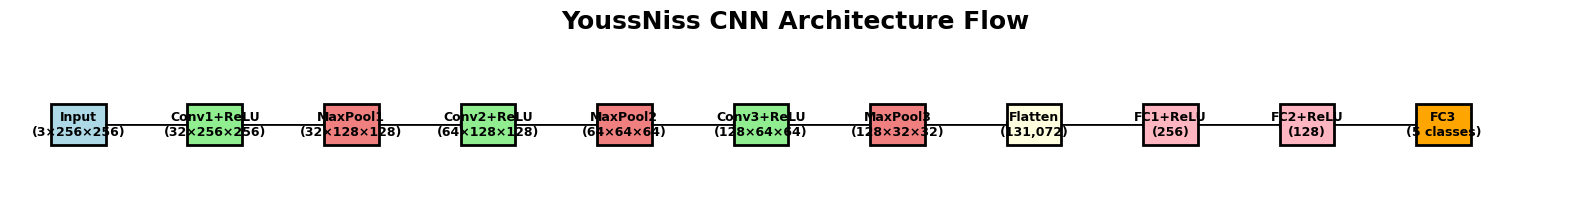

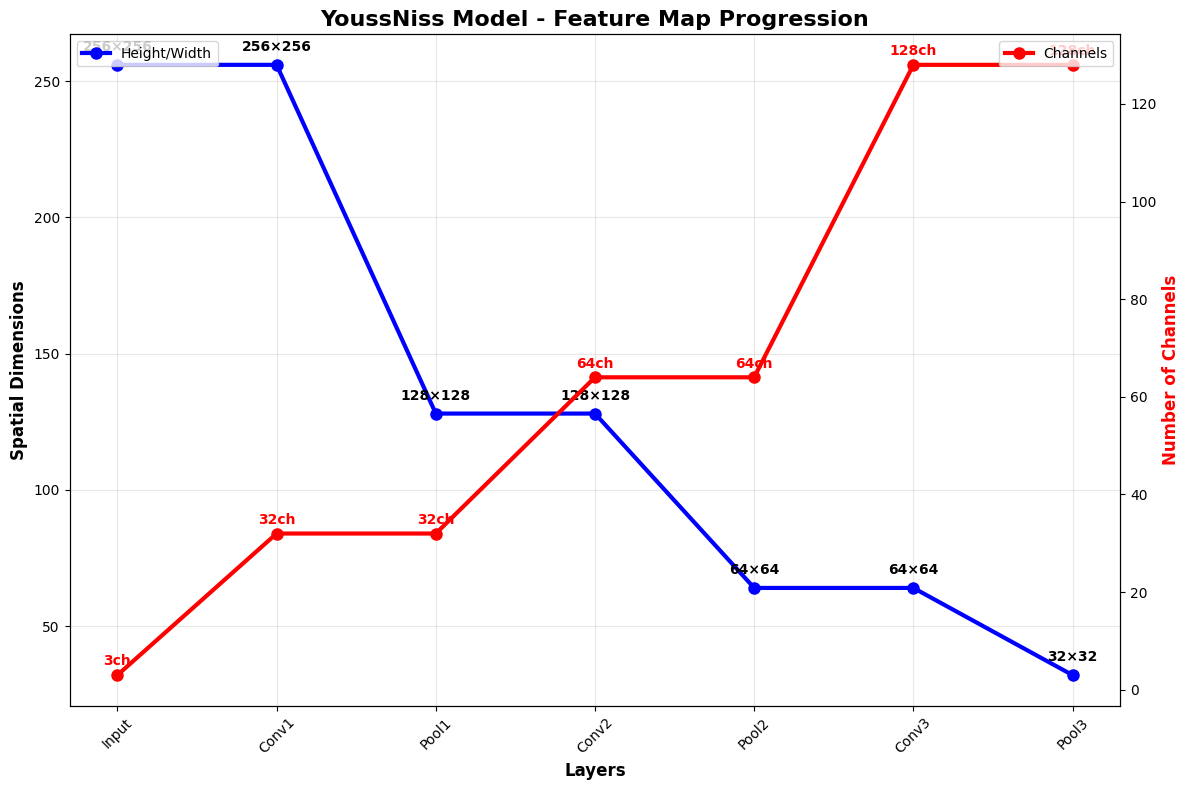

In [ ]:
# ========== CELL 9: Model Architecture Visualization ==========
def visualize_youssnis_architecture():
    """Visualize YoussNiss model architecture"""

    # Create model instance
    model = YoussNissModel()

    # Get architecture summary
    arch_summary = model.get_architecture_summary()

    # Display architecture table
    print("🏗️ YOUSSNIS MODEL ARCHITECTURE")
    print("=" * 80)

    # Create DataFrame for better visualization
    df = pd.DataFrame(arch_summary[1:], columns=arch_summary[0])
    print(df.to_string(index=False))

    # Calculate total parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"\n📊 MODEL STATISTICS:")
    print(f"   Total Parameters: {total_params:,}")
    print(f"   Trainable Parameters: {trainable_params:,}")
    print(f"   Model Size: ~{total_params * 4 / 1024 / 1024:.1f} MB")

    # Visualize architecture flow
    fig, ax = plt.subplots(figsize=(16, 10))

    # Architecture flow visualization
    layers = [
        "Input\n(3×256×256)", "Conv1+ReLU\n(32×256×256)", "MaxPool1\n(32×128×128)",
        "Conv2+ReLU\n(64×128×128)", "MaxPool2\n(64×64×64)", "Conv3+ReLU\n(128×64×64)",
        "MaxPool3\n(128×32×32)", "Flatten\n(131,072)", "FC1+ReLU\n(256)",
        "FC2+ReLU\n(128)", "FC3\n(5 classes)"
    ]

    positions = [(i*2, 0) for i in range(len(layers))]
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightgreen', 'lightcoral',
              'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightpink', 'orange']

    for i, (layer, pos, color) in enumerate(zip(layers, positions, colors)):
        rect = plt.Rectangle((pos[0]-0.4, pos[1]-0.3), 0.8, 0.6,
                           facecolor=color, edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        ax.text(pos[0], pos[1], layer, ha='center', va='center',
               fontweight='bold', fontsize=9)

        # Add arrows between layers
        if i < len(layers) - 1:
            ax.arrow(pos[0]+0.4, pos[1], 1.2, 0, head_width=0.1,
                    head_length=0.1, fc='black', ec='black')

    ax.set_xlim(-1, len(layers)*2)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('YoussNiss CNN Architecture Flow', fontsize=18, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

    # Feature map size progression
    fig, ax = plt.subplots(figsize=(12, 8))

    layer_names = ['Input', 'Conv1', 'Pool1', 'Conv2', 'Pool2', 'Conv3', 'Pool3']
    heights = [256, 256, 128, 128, 64, 64, 32]
    widths = [256, 256, 128, 128, 64, 64, 32]
    channels = [3, 32, 32, 64, 64, 128, 128]

    x_pos = range(len(layer_names))

    # Plot height and width
    ax.plot(x_pos, heights, 'bo-', linewidth=3, markersize=8, label='Height/Width')
    ax.set_ylabel('Spatial Dimensions', fontsize=12, fontweight='bold')
    ax.set_xlabel('Layers', fontsize=12, fontweight='bold')

    # Create second y-axis for channels
    ax2 = ax.twinx()
    ax2.plot(x_pos, channels, 'ro-', linewidth=3, markersize=8, label='Channels')
    ax2.set_ylabel('Number of Channels', fontsize=12, fontweight='bold', color='red')

    ax.set_xticks(x_pos)
    ax.set_xticklabels(layer_names, rotation=45)
    ax.grid(True, alpha=0.3)
    ax.set_title('YoussNiss Model - Feature Map Progression', fontsize=16, fontweight='bold')

    # Add value labels
    for i, (h, c) in enumerate(zip(heights, channels)):
        ax.text(i, h+5, f'{h}×{h}', ha='center', fontweight='bold')
        ax2.text(i, c+2, f'{c}ch', ha='center', fontweight='bold', color='red')

    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    return model

# Visualize architecture
model = visualize_youssnis_architecture()

✅ Data transforms defined!


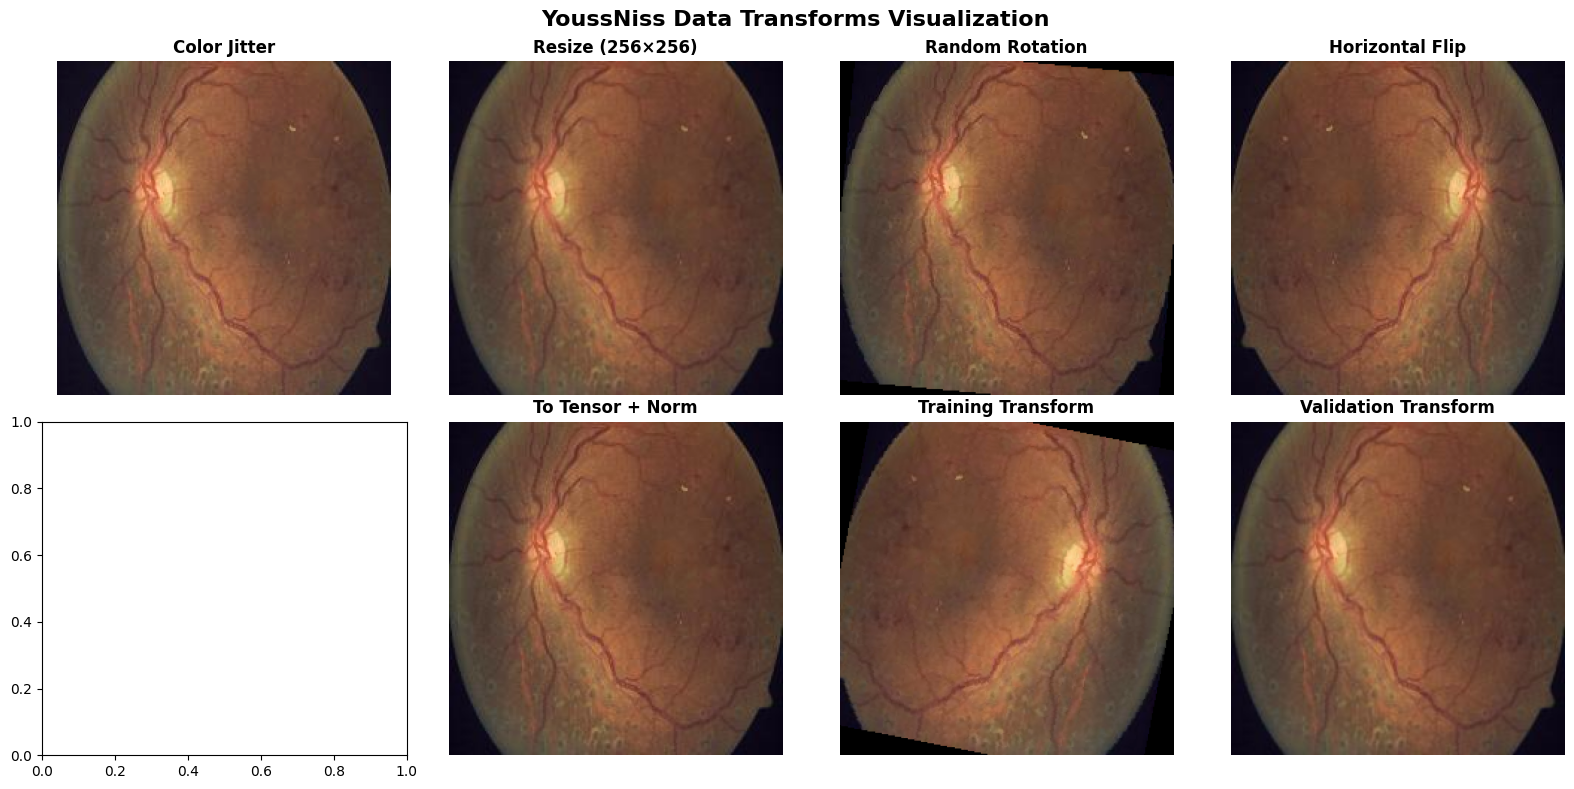

In [ ]:

# ========== CELL 10: Data Transforms and Preprocessing ==========
# Data transforms for training and validation
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("✅ Data transforms defined!")

# Visualize data transforms effect
def visualize_transforms():
    """Visualize the effect of data transforms"""
    if len(image_paths) > 0:
        # Load a sample image
        sample_img = Image.open(image_paths[0]).convert('RGB')

        fig, axes = plt.subplots(2, 4, figsize=(16, 8))

        # Original image
        axes[0,0].imshow(sample_img)
        axes[0,0].set_title('Original Image', fontweight='bold')
        axes[0,0].axis('off')

        # Apply different transforms
        transforms_list = [
            ("Resize (256×256)", transforms.Resize((256, 256))),
            ("Random Rotation", transforms.RandomRotation(30)),
            ("Horizontal Flip", transforms.RandomHorizontalFlip(1.0)),
            ("Color Jitter", transforms.ColorJitter(brightness=0.3, contrast=0.3)),
            ("To Tensor + Norm", transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])),
            ("Training Transform", train_transform),
            ("Validation Transform", val_transform)
        ]

        for idx, (name, transform) in enumerate(transforms_list):
            row = idx // 4
            col = (idx + 1) % 4

            try:
                transformed = transform(sample_img)

                if isinstance(transformed, torch.Tensor):
                    # Denormalize if it's a tensor
                    if transformed.shape[0] == 3:  # RGB channels
                        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
                        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
                        transformed = transformed * std + mean
                        transformed = torch.clamp(transformed, 0, 1)
                        transformed = transforms.ToPILImage()(transformed)

                axes[row, col].imshow(transformed)
                axes[row, col].set_title(name, fontweight='bold')
                axes[row, col].axis('off')

            except Exception as e:
                axes[row, col].text(0.5, 0.5, f"Error: {str(e)[:20]}",
                                  ha='center', va='center', transform=axes[row, col].transAxes)
                axes[row, col].set_title(name, fontweight='bold')
                axes[row, col].axis('off')

        plt.suptitle('YoussNiss Data Transforms Visualization', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

visualize_transforms()

📊 Dataset Split:
   Training: 1986 images (70.0%)
   Validation: 426 images (15.0%)
   Test: 426 images (15.0%)
✅ Data loaders created successfully!
   Train batches: 80
   Validation batches: 18
   Test batches: 18


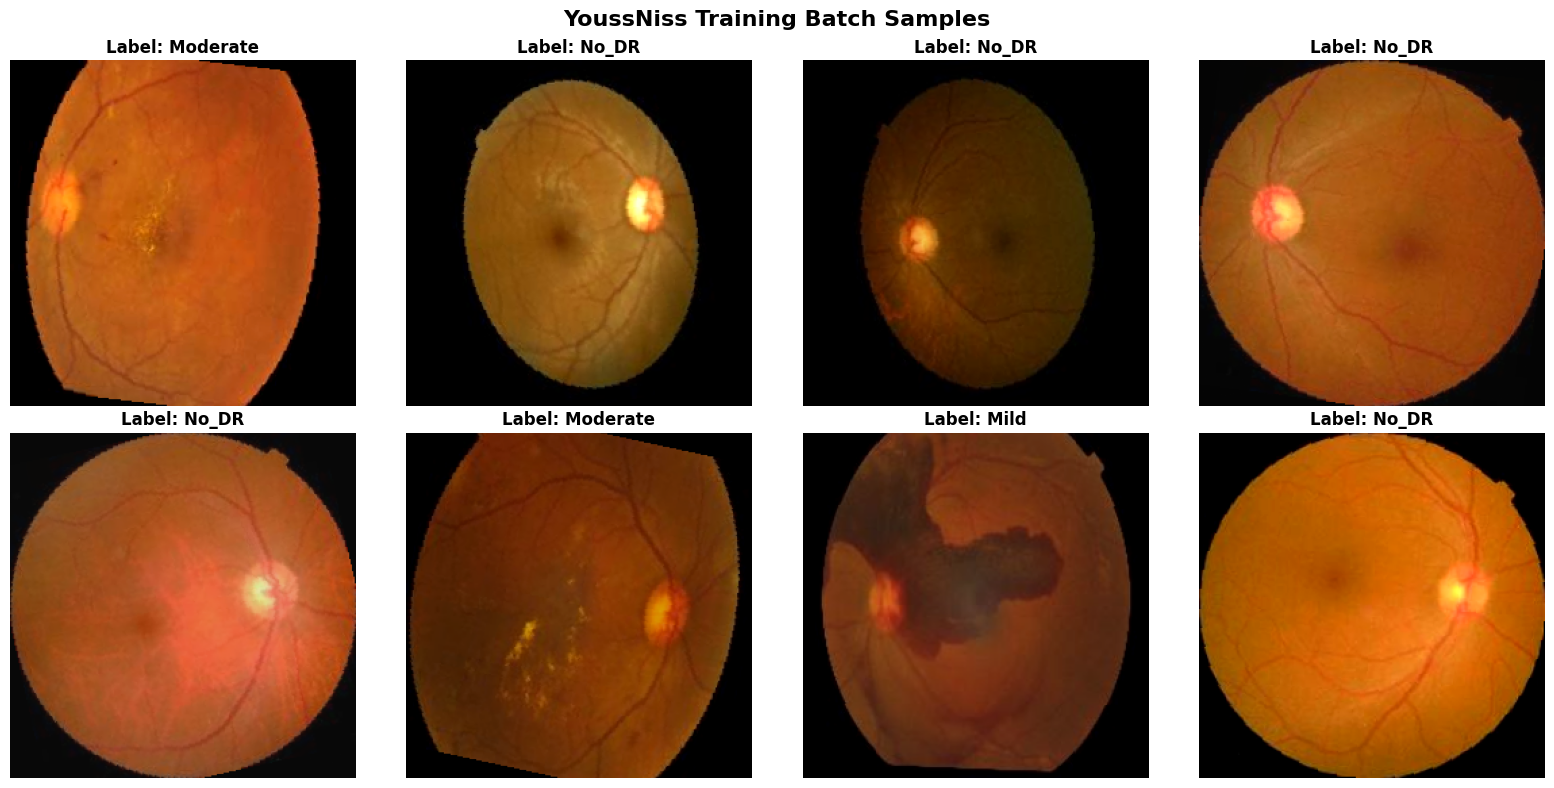

In [ ]:
# ========== CELL 11: Dataset Splitting and Data Loaders ==========
# Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    image_paths, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"📊 Dataset Split:")
print(f"   Training: {len(X_train)} images ({len(X_train)/len(image_paths)*100:.1f}%)")
print(f"   Validation: {len(X_val)} images ({len(X_val)/len(image_paths)*100:.1f}%)")
print(f"   Test: {len(X_test)} images ({len(X_test)/len(image_paths)*100:.1f}%)")

# Create datasets
train_dataset = DiabeticRetinopathyDataset(X_train, y_train, train_transform)
val_dataset = DiabeticRetinopathyDataset(X_val, y_val, val_transform)
test_dataset = DiabeticRetinopathyDataset(X_test, y_test, val_transform)

# Create data loaders
batch_size = 25
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print("✅ Data loaders created successfully!")
print(f"   Train batches: {len(train_loader)}")
print(f"   Validation batches: {len(val_loader)}")
print(f"   Test batches: {len(test_loader)}")

# Visualize batch samples
def visualize_batch_samples():
    """Visualize a batch of training samples"""
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.ravel()

    for i in range(min(8, len(images))):
        # Denormalize image for display
        img = images[i]
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
        img = img * std + mean
        img = torch.clamp(img, 0, 1)

        # Convert to numpy for display
        img_np = img.permute(1, 2, 0).numpy()

        axes[i].imshow(img_np)
        axes[i].set_title(f'Label: {label_names[labels[i]]}', fontweight='bold')
        axes[i].axis('off')

    plt.suptitle('YoussNiss Training Batch Samples', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

visualize_batch_samples()

In [1]:
!pip install torchviz
!apt-get install graphviz -y
!pip install graphviz

from torchviz import make_dot
from IPython.display import Image, display
import os

print("✅ TorchViz and Graphviz installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

🔧 Model reloaded successfully!
🎨 GENERATING FIXED CNN ARCHITECTURE VISUALIZATION...
📊 Input tensor shape: torch.Size([1, 3, 256, 256])
📊 Output tensor shape: torch.Size([1, 1])

1️⃣ Creating detailed computational graph...
2️⃣ Creating simplified computational graph...

🖼️ DISPLAYING ARCHITECTURE GRAPHS:
📊 DETAILED COMPUTATIONAL GRAPH:


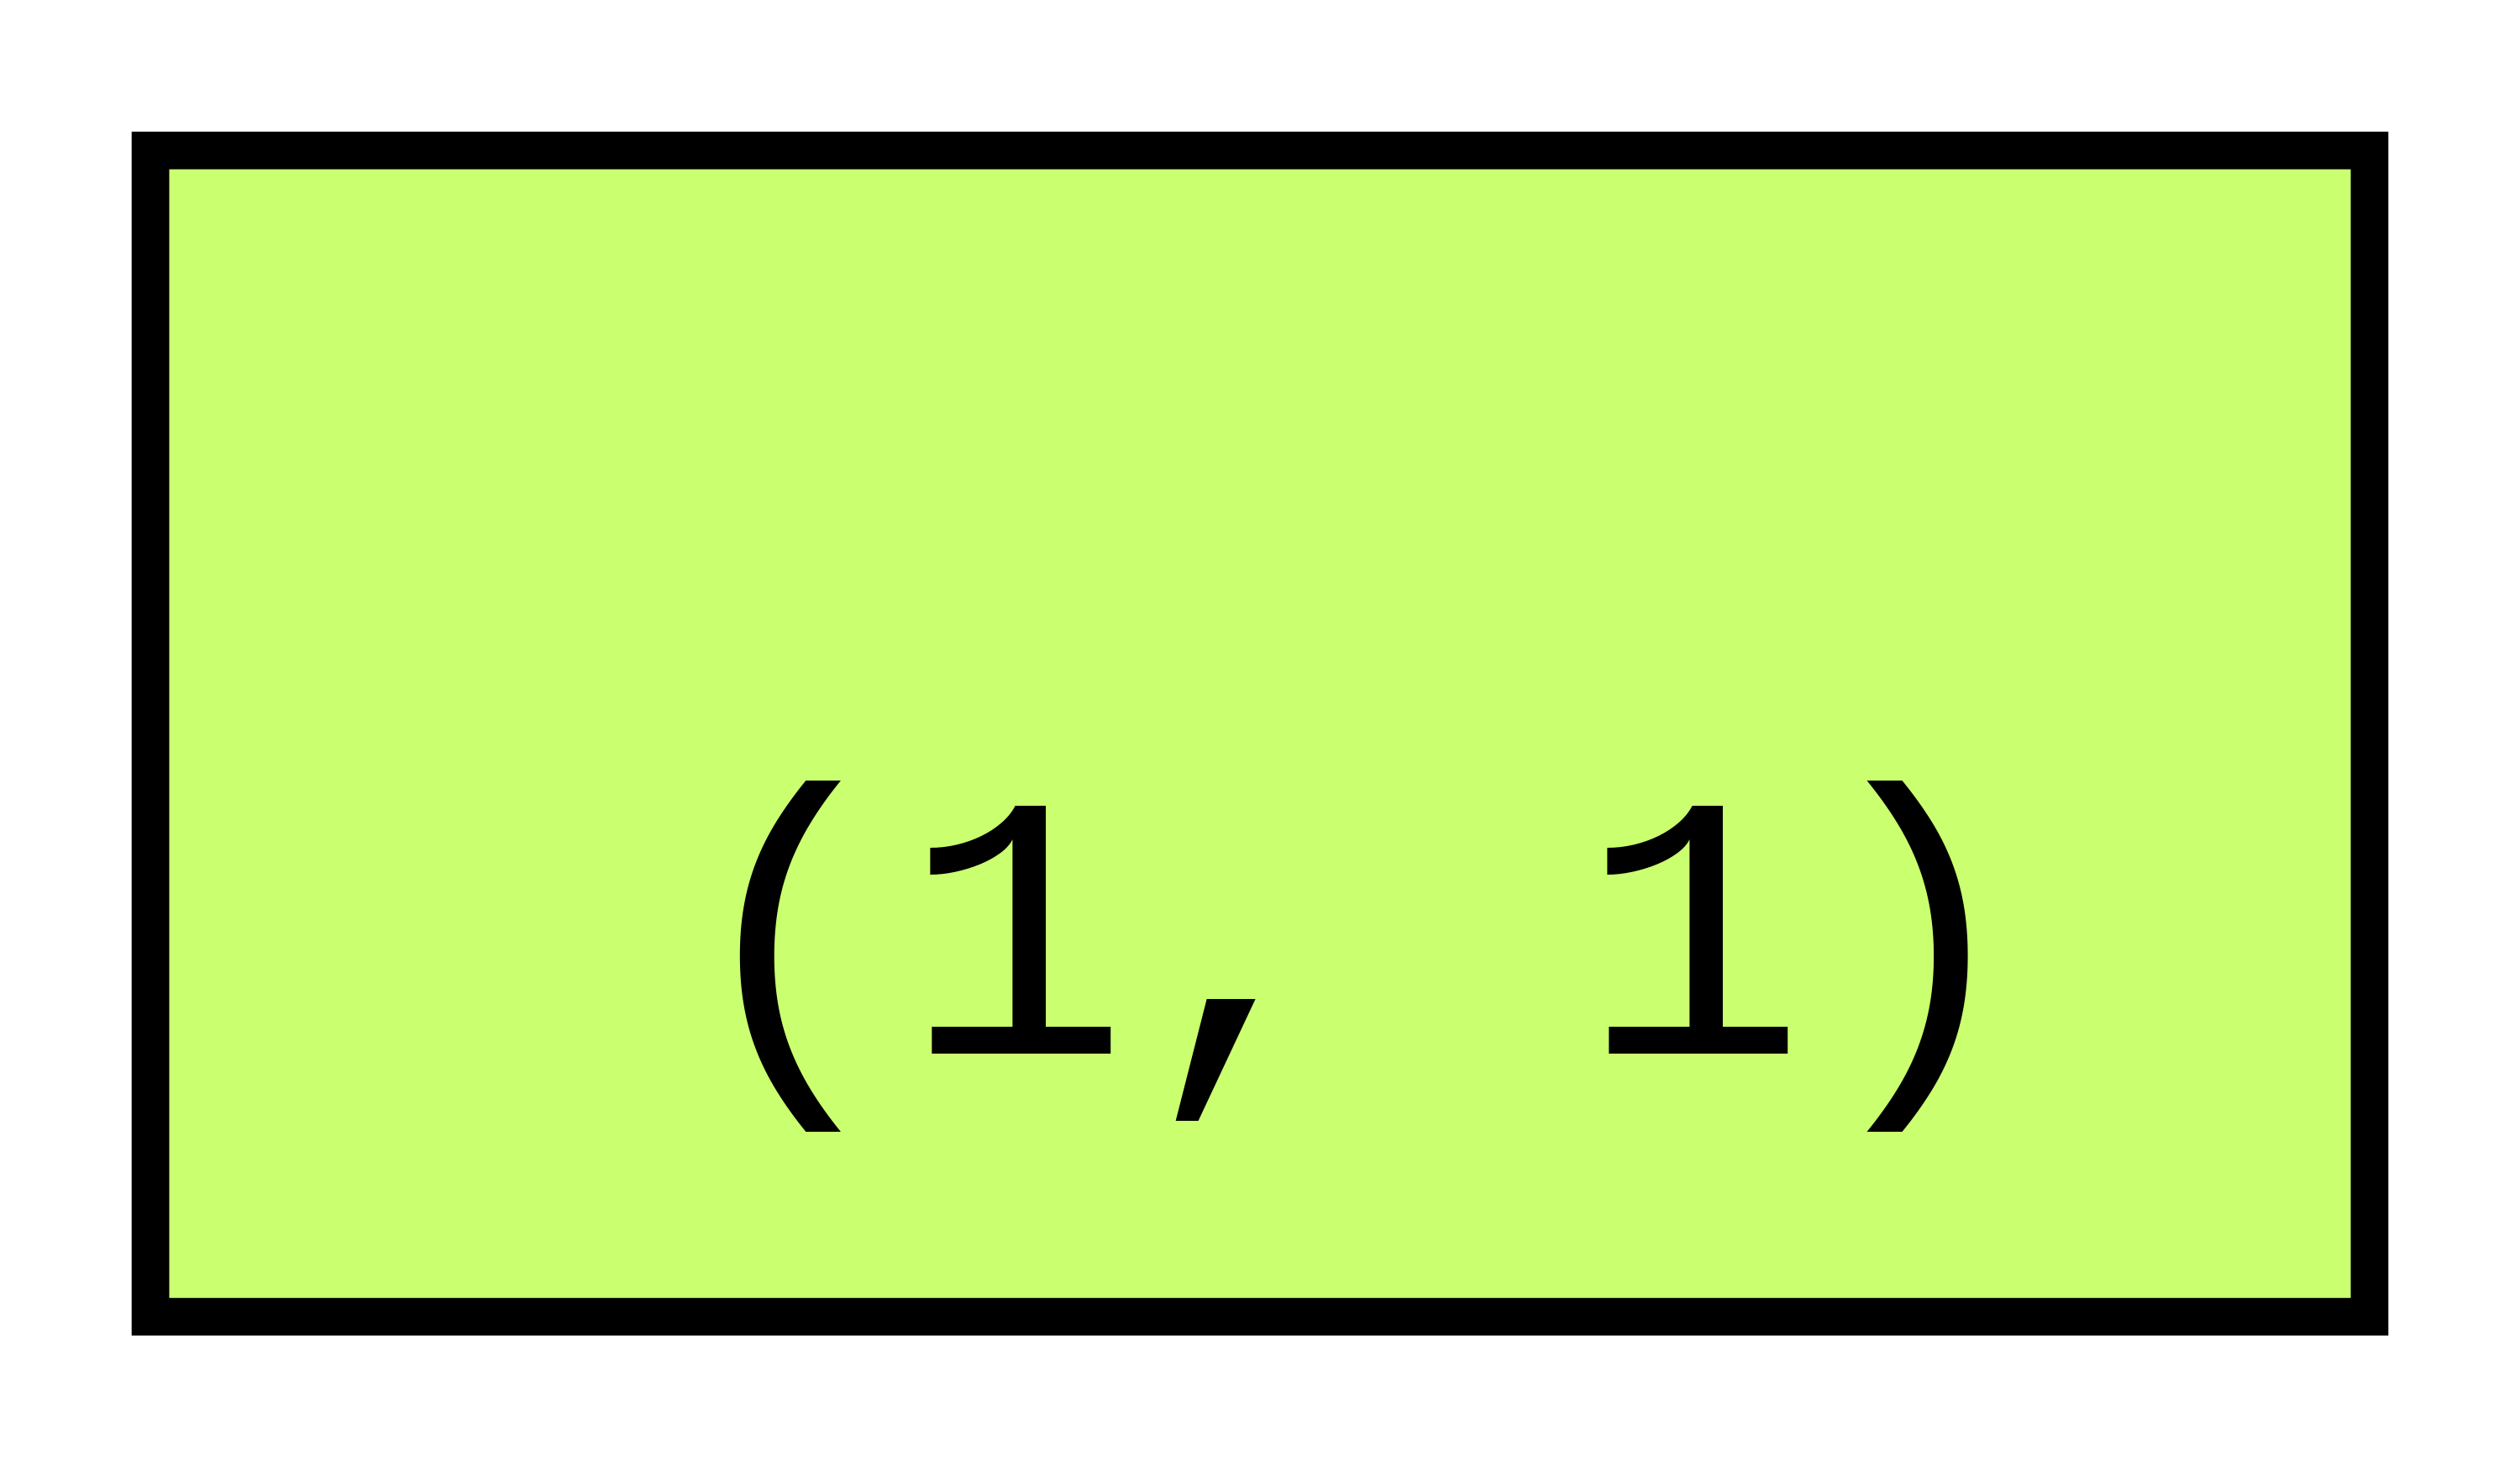

✅ Detailed graph saved as: cnn_architecture_detailed.png

--------------------------------------------------
📊 SIMPLIFIED COMPUTATIONAL GRAPH:


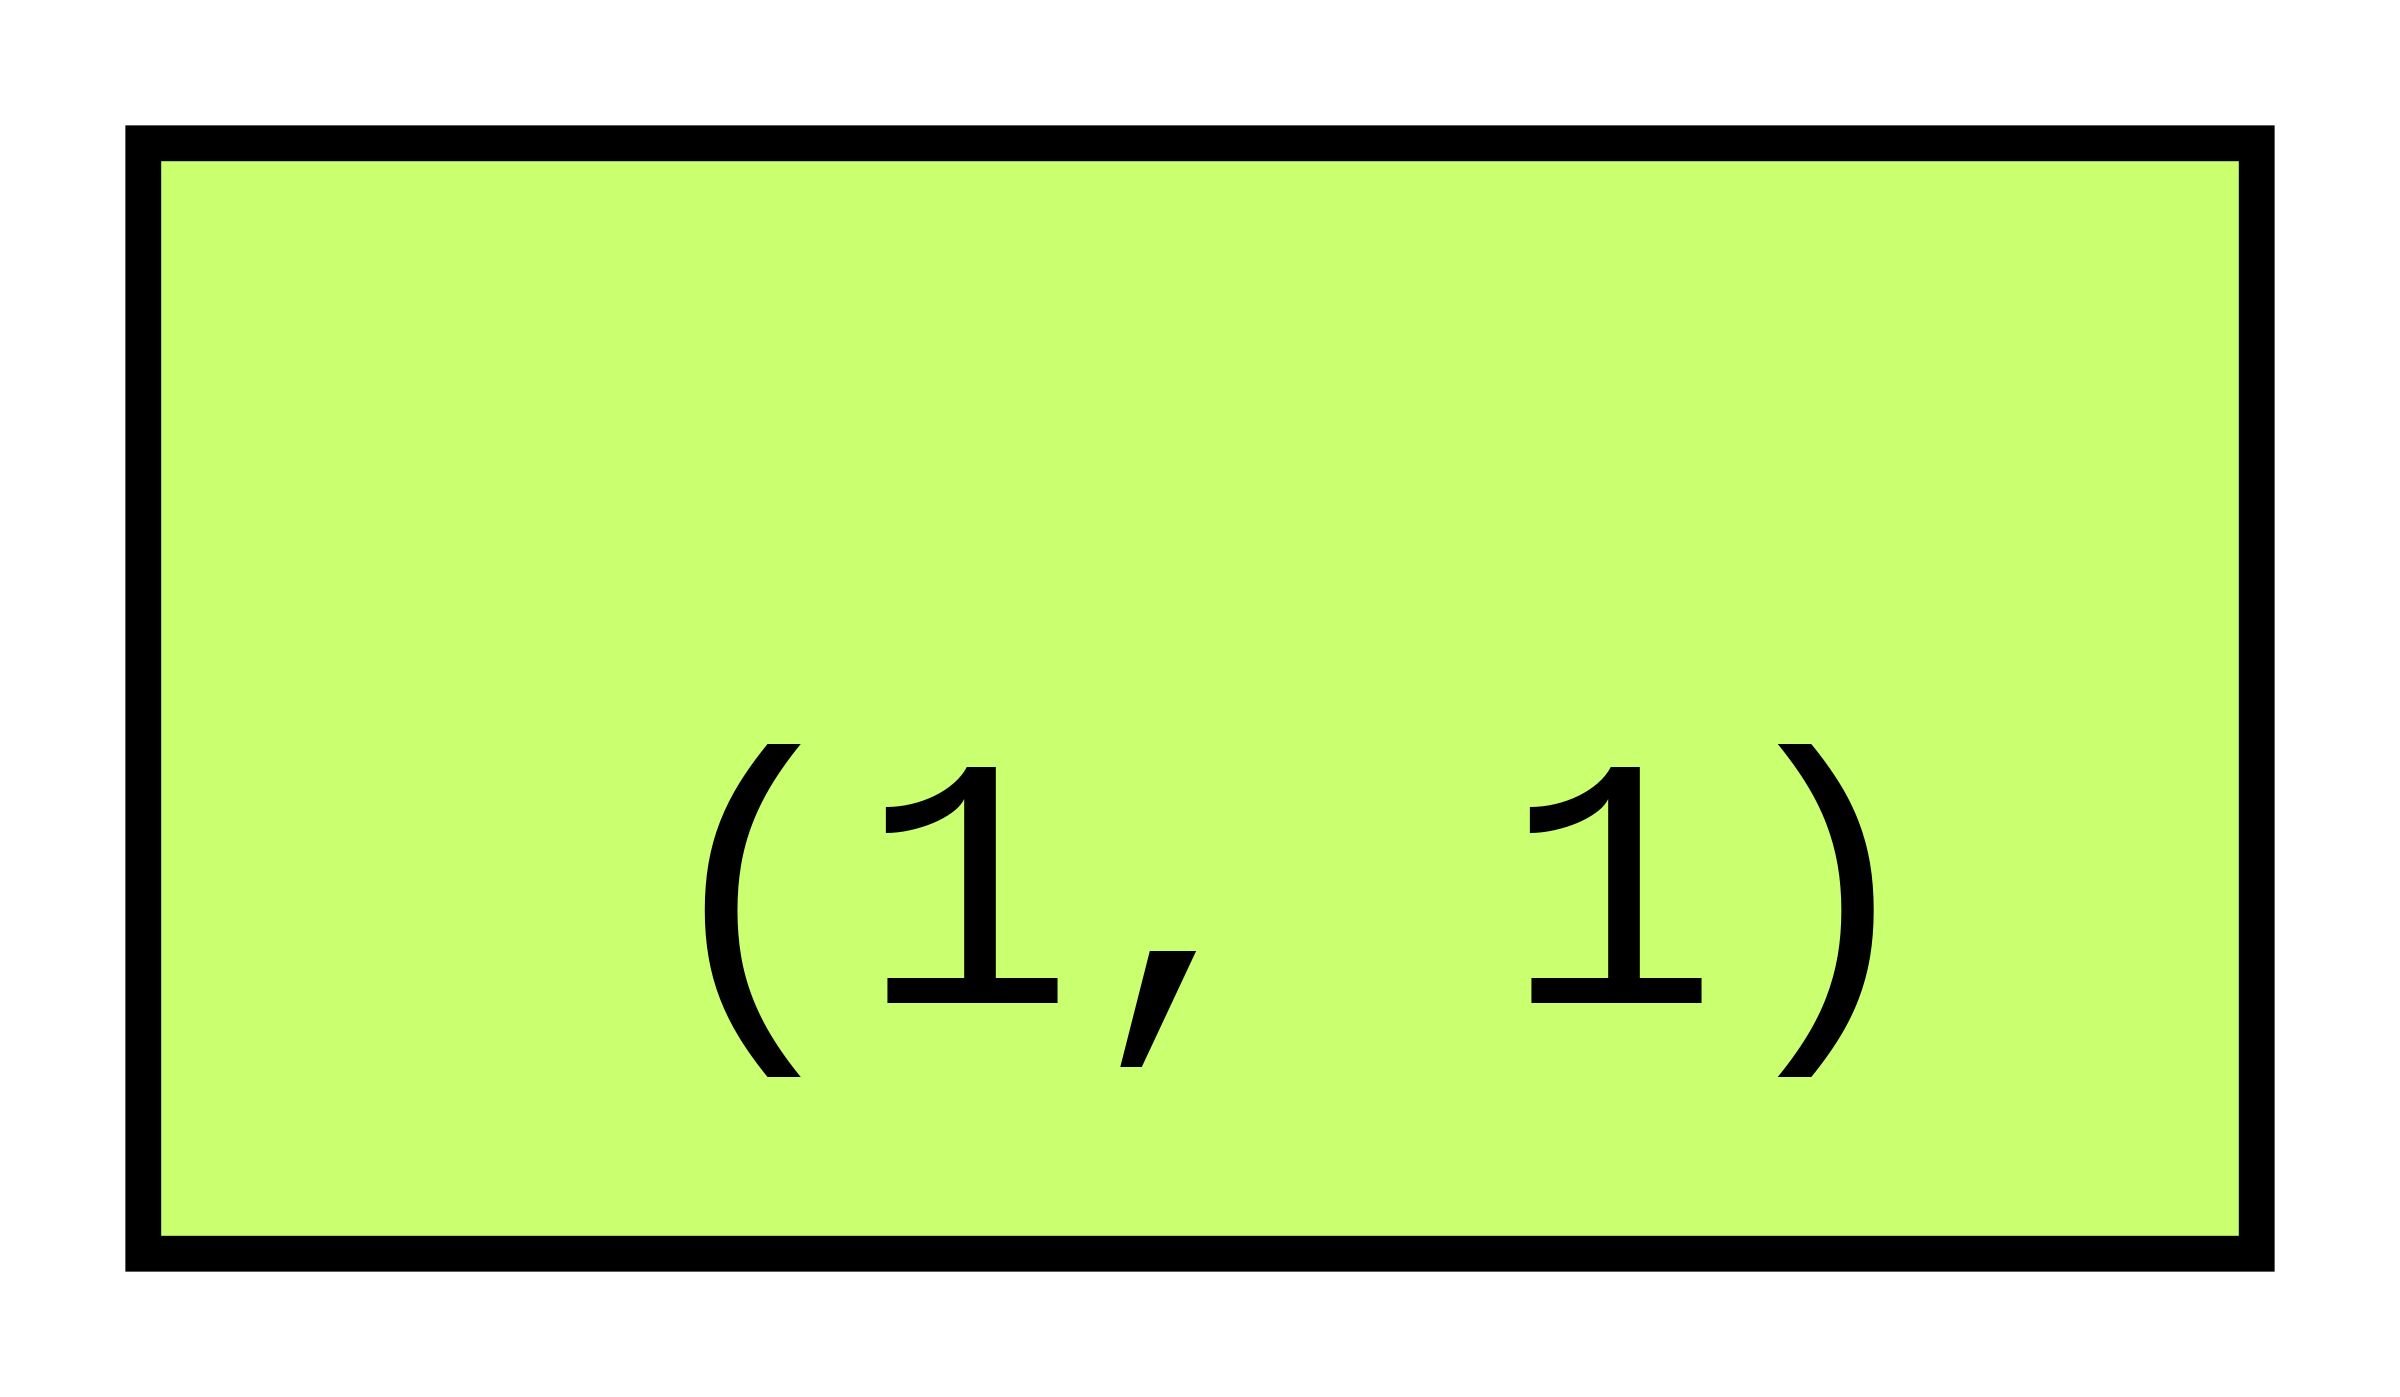

✅ Simplified graph saved as: cnn_architecture_simple.png

🎨 CREATING LAYER-BY-LAYER DIAGRAM...


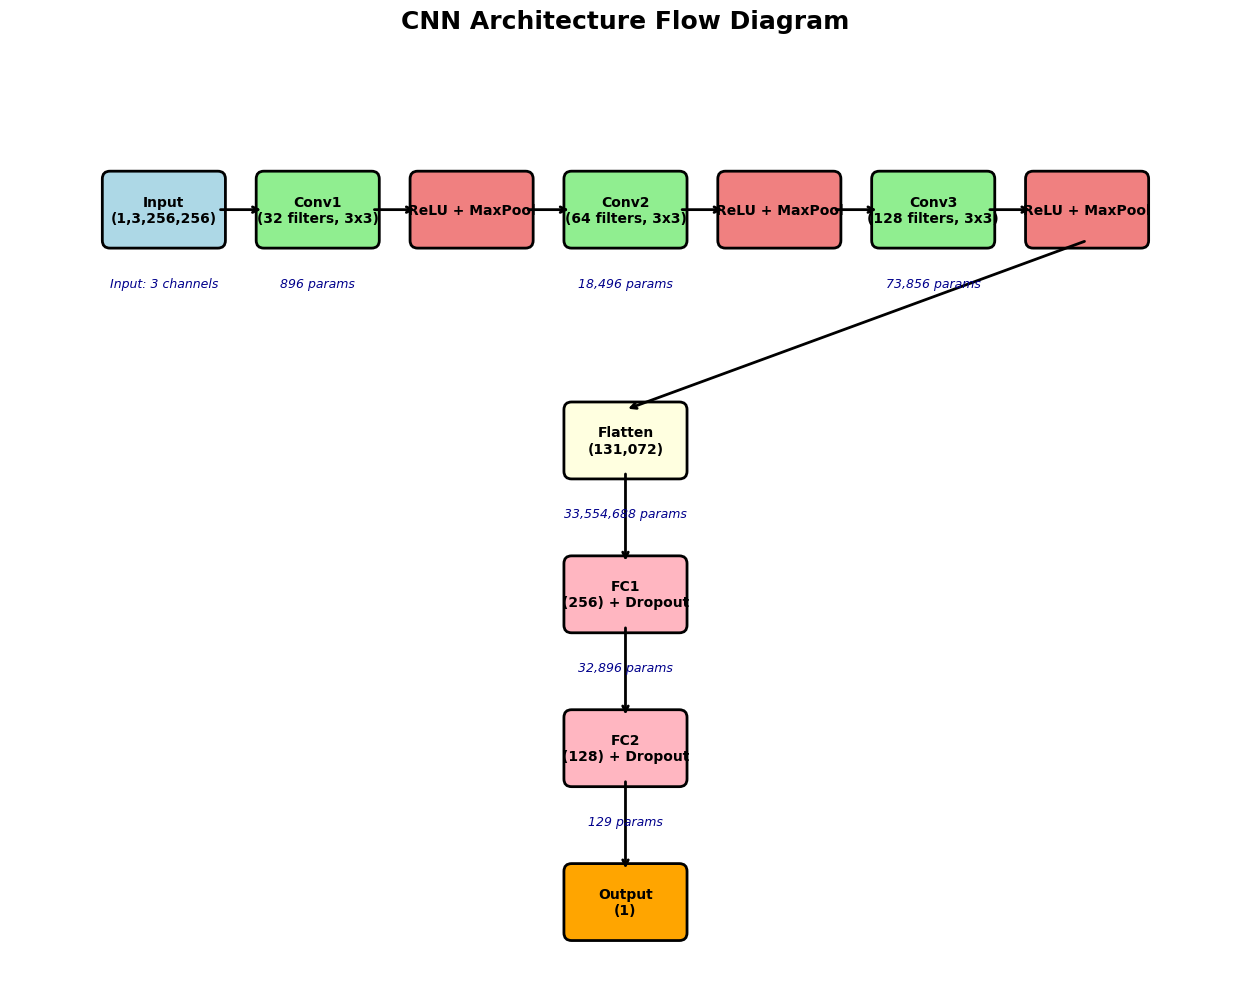

✅ Manual diagram saved as: cnn_manual_diagram.png

📥 DOWNLOADING ALL ARCHITECTURE FILES...
⬇️ Downloading: cnn_architecture_simple.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: cnn_manual_diagram.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: cnn_architecture_detailed.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded 3 files!

📁 Files in directory:
   • cnn_architecture_simple.png
   • cnn_manual_diagram.png
   • cnn_architecture_detailed.png
   • custom_cnn_architecture.png

🎉 FIXED CNN ARCHITECTURE VISUALIZATION COMPLETE!
📊 You should now see properly sized computational graphs!
📁 Generated files:
   • cnn_architecture_detailed.png (full computational graph)
   • cnn_architecture_simple.png (simplified view)
   • cnn_manual_diagram.png (manual flow diagram)


<Figure size 640x480 with 0 Axes>

In [4]:
# Fixed CNN TorchViz Visualization - Better Display
# Run this cell to fix the tiny image issue

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchviz import make_dot
from IPython.display import Image, display
import os

# ========== Your CNN Model (same as before) ==========
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flatten layer
        self.flatten = nn.Flatten()

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

print("🔧 Model reloaded successfully!")

# ========== FIXED TORCHVIZ VISUALIZATION ==========
def generate_proper_cnn_architecture():
    """Generate properly sized CNN architecture visualization"""
    print("🎨 GENERATING FIXED CNN ARCHITECTURE VISUALIZATION...")
    print("=" * 60)

    # Set model to evaluation mode
    model.eval()

    # Create example input
    x = torch.randn(1, 3, 256, 256).to(device)
    print(f"📊 Input tensor shape: {x.shape}")

    # Forward pass
    with torch.no_grad():
        y = model(x)

    print(f"📊 Output tensor shape: {y.shape}")

    # ========== METHOD 1: DETAILED GRAPH ==========
    print("\n1️⃣ Creating detailed computational graph...")

    # Create computational graph with better parameters
    dot_detailed = make_dot(y, params=dict(model.named_parameters()), show_attrs=True, show_saved=True)

    # Better graph settings for detailed view
    dot_detailed.format = 'png'
    dot_detailed.attr(rankdir='TB')  # Top to bottom
    dot_detailed.attr(size='20,30!')  # Force larger size
    dot_detailed.attr(dpi='150')  # Higher resolution
    dot_detailed.attr('node',
                     shape='box',
                     style='filled,rounded',
                     fillcolor='lightblue',
                     fontsize='12',
                     fontname='Arial',
                     margin='0.3')
    dot_detailed.attr('edge',
                     fontsize='10',
                     fontname='Arial',
                     penwidth='2')

    # Render detailed graph
    filename_detailed = 'cnn_architecture_detailed'
    dot_detailed.render(filename_detailed, cleanup=True)

    # ========== METHOD 2: SIMPLIFIED GRAPH ==========
    print("2️⃣ Creating simplified computational graph...")

    # Create simplified graph (only first few parameters for cleaner view)
    simplified_params = dict(list(model.named_parameters())[:8])  # First 8 parameters only

    dot_simple = make_dot(y, params=simplified_params, show_attrs=False, show_saved=False)

    # Settings for simplified view
    dot_simple.format = 'png'
    dot_simple.attr(rankdir='TB')
    dot_simple.attr(size='16,20!')
    dot_simple.attr(dpi='150')
    dot_simple.attr('node',
                   shape='ellipse',
                   style='filled',
                   fillcolor='lightgreen',
                   fontsize='14',
                   fontname='Arial Bold',
                   margin='0.4')
    dot_simple.attr('edge',
                   fontsize='12',
                   fontname='Arial',
                   penwidth='3')

    # Render simplified graph
    filename_simple = 'cnn_architecture_simple'
    dot_simple.render(filename_simple, cleanup=True)

    # ========== DISPLAY RESULTS ==========
    print("\n🖼️ DISPLAYING ARCHITECTURE GRAPHS:")
    print("=" * 50)

    # Display detailed graph
    if os.path.exists(f'{filename_detailed}.png'):
        print("📊 DETAILED COMPUTATIONAL GRAPH:")
        display(Image(filename=f'{filename_detailed}.png', width=800))
        print(f"✅ Detailed graph saved as: {filename_detailed}.png")
    else:
        print("❌ Detailed graph not generated")

    print("\n" + "-"*50)

    # Display simplified graph
    if os.path.exists(f'{filename_simple}.png'):
        print("📊 SIMPLIFIED COMPUTATIONAL GRAPH:")
        display(Image(filename=f'{filename_simple}.png', width=600))
        print(f"✅ Simplified graph saved as: {filename_simple}.png")
    else:
        print("❌ Simplified graph not generated")

    return dot_detailed, dot_simple

# Generate the fixed visualization
detailed_graph, simple_graph = generate_proper_cnn_architecture()

# ========== ALTERNATIVE: LAYER-BY-LAYER VISUALIZATION ==========
def create_layer_diagram():
    """Create a manual layer diagram as backup"""
    print("\n🎨 CREATING LAYER-BY-LAYER DIAGRAM...")

    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    fig, ax = plt.subplots(figsize=(16, 10))

    # Define layers and their properties
    layers = [
        {"name": "Input\n(1,3,256,256)", "pos": (1, 8), "color": "lightblue"},
        {"name": "Conv1\n(32 filters, 3x3)", "pos": (3, 8), "color": "lightgreen"},
        {"name": "ReLU + MaxPool", "pos": (5, 8), "color": "lightcoral"},
        {"name": "Conv2\n(64 filters, 3x3)", "pos": (7, 8), "color": "lightgreen"},
        {"name": "ReLU + MaxPool", "pos": (9, 8), "color": "lightcoral"},
        {"name": "Conv3\n(128 filters, 3x3)", "pos": (11, 8), "color": "lightgreen"},
        {"name": "ReLU + MaxPool", "pos": (13, 8), "color": "lightcoral"},
        {"name": "Flatten\n(131,072)", "pos": (7, 5), "color": "lightyellow"},
        {"name": "FC1\n(256) + Dropout", "pos": (7, 3), "color": "lightpink"},
        {"name": "FC2\n(128) + Dropout", "pos": (7, 1), "color": "lightpink"},
        {"name": "Output\n(1)", "pos": (7, -1), "color": "orange"}
    ]

    # Draw layers
    for layer in layers:
        rect = patches.FancyBboxPatch(
            (layer["pos"][0]-0.7, layer["pos"][1]-0.4), 1.4, 0.8,
            boxstyle="round,pad=0.1",
            facecolor=layer["color"],
            edgecolor='black',
            linewidth=2
        )
        ax.add_patch(rect)
        ax.text(layer["pos"][0], layer["pos"][1], layer["name"],
                ha='center', va='center', fontweight='bold', fontsize=10)

    # Draw arrows
    arrow_connections = [
        ((1.7, 8), (2.3, 8)),    # Input -> Conv1
        ((3.7, 8), (4.3, 8)),    # Conv1 -> ReLU+Pool
        ((5.7, 8), (6.3, 8)),    # ReLU+Pool -> Conv2
        ((7.7, 8), (8.3, 8)),    # Conv2 -> ReLU+Pool
        ((9.7, 8), (10.3, 8)),   # ReLU+Pool -> Conv3
        ((11.7, 8), (12.3, 8)),  # Conv3 -> ReLU+Pool
        ((13, 7.6), (7, 5.4)),   # ReLU+Pool -> Flatten
        ((7, 4.6), (7, 3.4)),    # Flatten -> FC1
        ((7, 2.6), (7, 1.4)),    # FC1 -> FC2
        ((7, 0.6), (7, -0.6))    # FC2 -> Output
    ]

    for start, end in arrow_connections:
        ax.annotate('', xy=end, xytext=start,
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))

    # Add parameter counts
    param_info = [
        {"pos": (1, 7), "text": "Input: 3 channels"},
        {"pos": (3, 7), "text": "896 params"},
        {"pos": (7, 7), "text": "18,496 params"},
        {"pos": (11, 7), "text": "73,856 params"},
        {"pos": (7, 4), "text": "33,554,688 params"},
        {"pos": (7, 2), "text": "32,896 params"},
        {"pos": (7, 0), "text": "129 params"}
    ]

    for info in param_info:
        ax.text(info["pos"][0], info["pos"][1], info["text"],
               ha='center', fontsize=9, style='italic', color='darkblue')

    ax.set_xlim(-1, 15)
    ax.set_ylim(-2, 10)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('CNN Architecture Flow Diagram', fontsize=18, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.show()

    # Save the plot
    plt.savefig('cnn_manual_diagram.png', dpi=150, bbox_inches='tight')
    print("✅ Manual diagram saved as: cnn_manual_diagram.png")

# Create manual diagram as backup
create_layer_diagram()

# ========== DOWNLOAD ALL FILES ==========
def download_all_architecture_files():
    """Download all generated architecture files"""
    from google.colab import files
    import glob

    print("\n📥 DOWNLOADING ALL ARCHITECTURE FILES...")

    # Find all PNG files
    png_files = glob.glob("cnn_*.png")

    if png_files:
        for file in png_files:
            print(f"⬇️ Downloading: {file}")
            files.download(file)
        print(f"✅ Downloaded {len(png_files)} files!")
    else:
        print("❌ No PNG files found!")

    # List files in directory
    print(f"\n📁 Files in directory:")
    for file in os.listdir('.'):
        if 'cnn' in file.lower() and '.png' in file:
            print(f"   • {file}")

# Download files
download_all_architecture_files()

print("\n🎉 FIXED CNN ARCHITECTURE VISUALIZATION COMPLETE!")
print("📊 You should now see properly sized computational graphs!")
print("📁 Generated files:")
print("   • cnn_architecture_detailed.png (full computational graph)")
print("   • cnn_architecture_simple.png (simplified view)")
print("   • cnn_manual_diagram.png (manual flow diagram)")

🔧 Model initialized for computational graph generation!
🎨 GENERATING EXACT TORCHVIZ COMPUTATIONAL GRAPH...
📊 Input tensor shape: torch.Size([1, 3, 256, 256])
📊 Input requires_grad: True
📊 Output tensor shape: torch.Size([1, 1])
📊 Output requires_grad: True
🔧 Creating computational graph with full gradient flow...
💾 Saving graph as: cnn_computational_graph.png
🖼️ DISPLAYING COMPUTATIONAL GRAPH:
📋 This shows the exact backward pass operations like Image 2


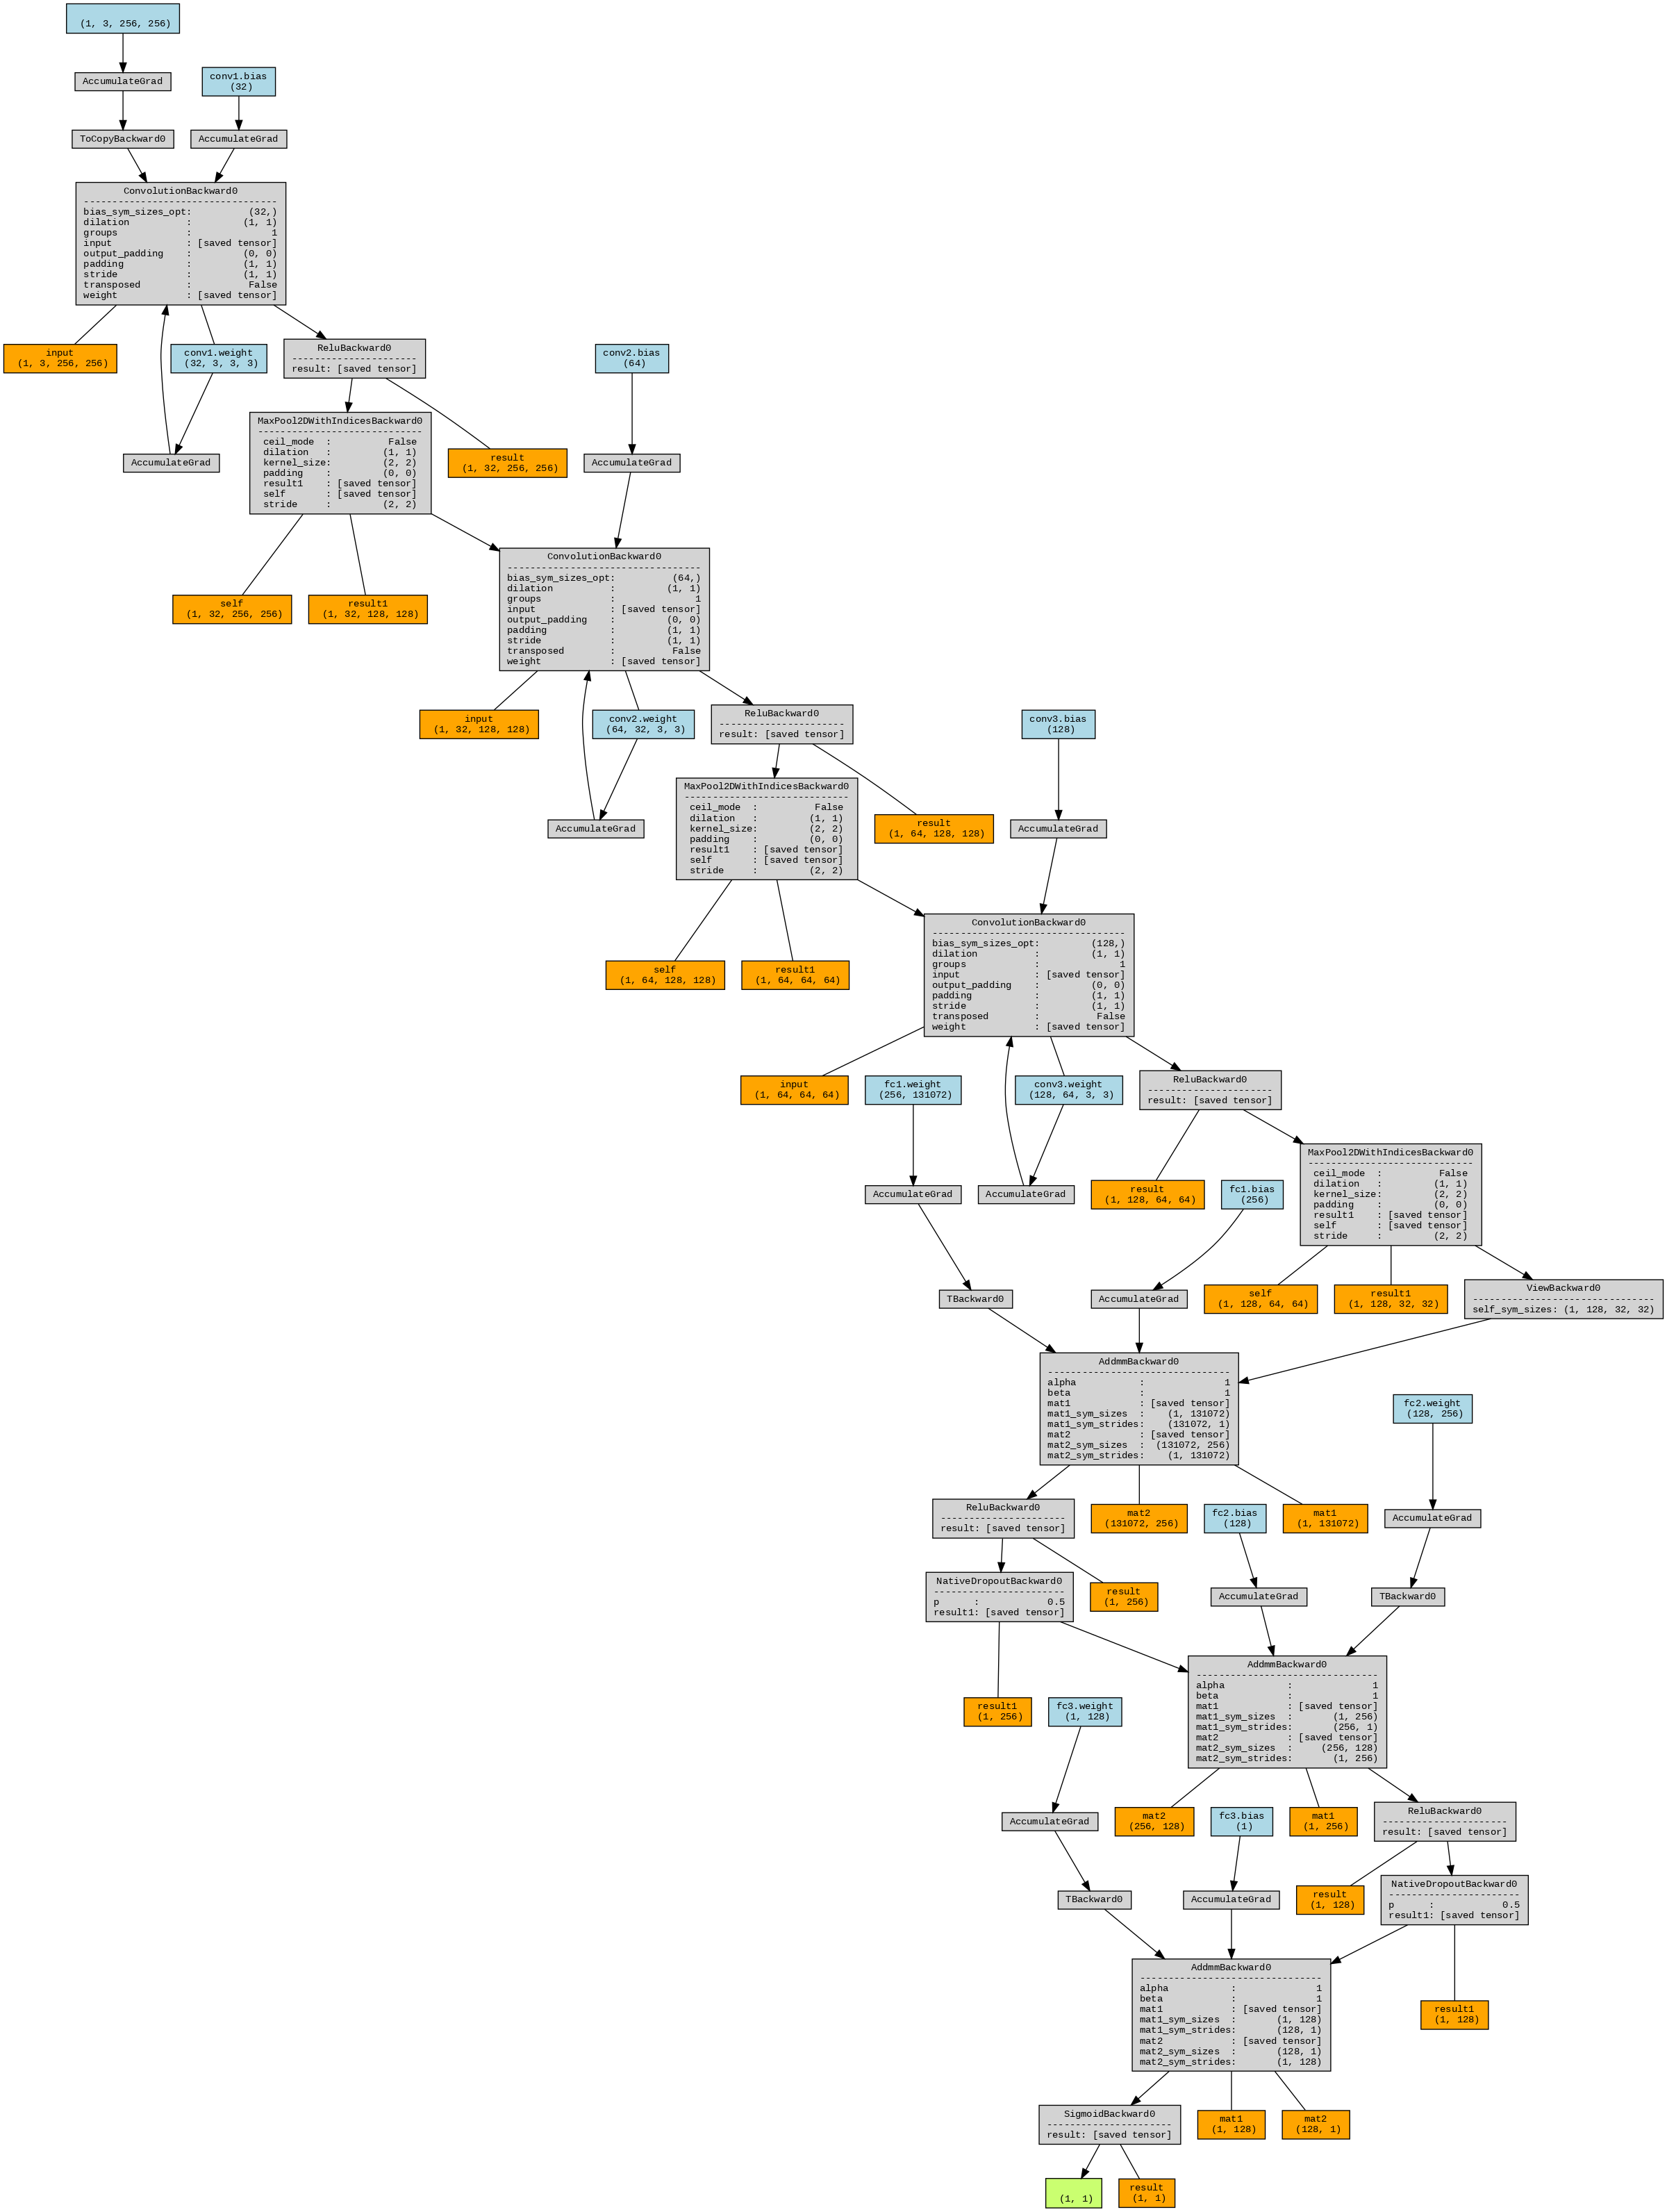

✅ Graph successfully saved as: cnn_computational_graph.png

🔍 VERIFYING GRAPH STRUCTURE...
📊 Model Parameters in Graph:
   • conv1.weight: (32, 3, 3, 3) (864 params)
   • conv1.bias: (32,) (32 params)
   • conv2.weight: (64, 32, 3, 3) (18,432 params)
   • conv2.bias: (64,) (64 params)
   • conv3.weight: (128, 64, 3, 3) (73,728 params)
   • conv3.bias: (128,) (128 params)
   • fc1.weight: (256, 131072) (33,554,432 params)
   • fc1.bias: (256,) (256 params)
   • fc2.weight: (128, 256) (32,768 params)
   • fc2.bias: (128,) (128 params)
   • fc3.weight: (1, 128) (128 params)
   • fc3.bias: (1,) (1 params)

📈 Total Parameters: 33,680,961

🔧 Expected Operations in Graph:
   • ConvolutionBackward0
   • ReluBackward0
   • MaxPool2dWithIndicesBackward0
   • AccumulateGrad
   • AddmmBackward0
   • SigmoidBackward0

🎯 The graph should show:
   • Parameter tensors (conv1.weight, conv1.bias, etc.)
   • Backward operations for each layer
   • AccumulateGrad operations for gradients
   • Connected bo

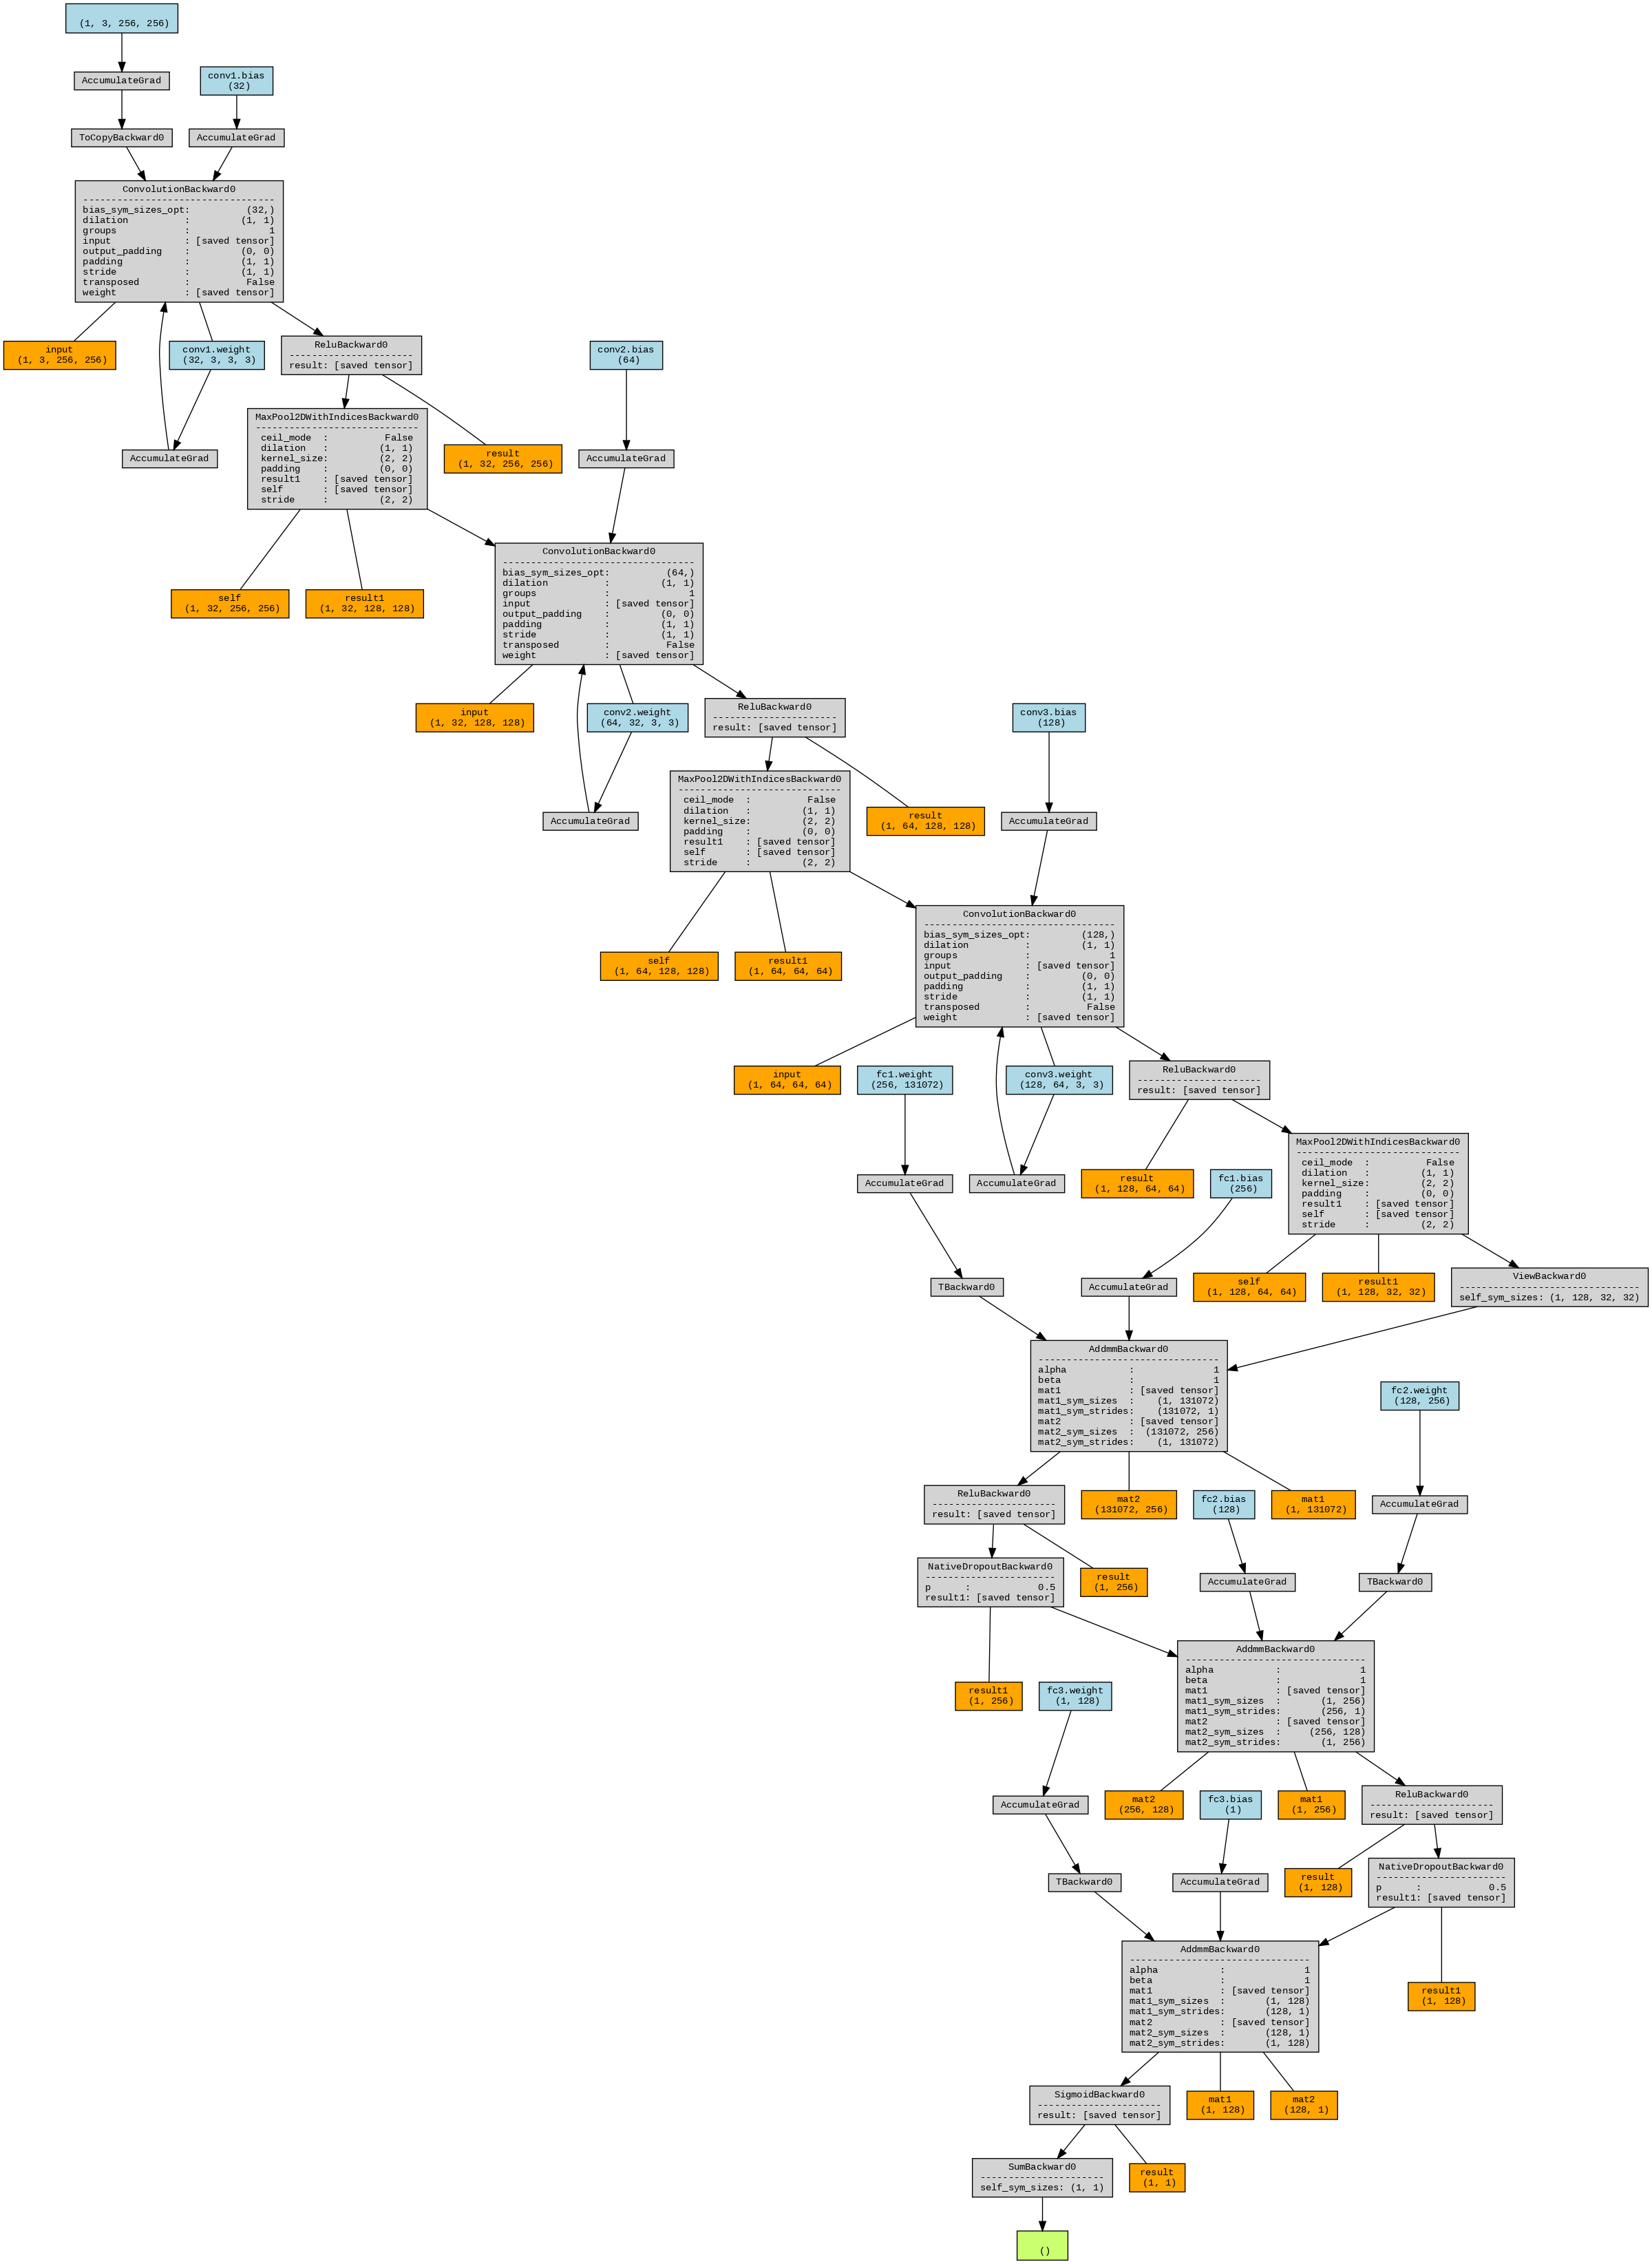

✅ Backward graph saved as: cnn_backward_graph.png

📥 DOWNLOADING COMPUTATIONAL GRAPH FILES...
⬇️ Downloading: cnn_computational_graph.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: cnn_backward_graph.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded 2 computational graph files!

📁 Generated files:
   • cnn_architecture_simple.png
   • cnn_computational_graph.png
   • cnn_manual_diagram.png
   • cnn_architecture_detailed.png
   • custom_cnn_architecture.png
   • cnn_backward_graph.png

🎉 COMPUTATIONAL GRAPH GENERATION COMPLETE!
🎯 You should now see the exact computational graph like Image 2:
   • Parameter boxes (conv1.weight, conv1.bias, etc.)
   • Backward operation boxes (ConvolutionBackward0, etc.)
   • AccumulateGrad operations
   • All boxes connected from top to bottom
   • Final output at the bottom

📁 Files generated:
   • cnn_computational_graph.png (main graph)
   • cnn_backward_graph.png (with backward pass)


In [5]:
# Generate Exact TorchViz Computational Graph (like Image 2)
# This creates the detailed backward pass visualization

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot
from IPython.display import Image, display
import os

# ========== Your CNN Model ==========
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

print("🔧 Model initialized for computational graph generation!")

# ========== GENERATE EXACT TORCHVIZ GRAPH ==========
def create_exact_computational_graph():
    """Generate the exact TorchViz computational graph like Image 2"""
    print("🎨 GENERATING EXACT TORCHVIZ COMPUTATIONAL GRAPH...")
    print("=" * 60)

    # IMPORTANT: Set model to TRAINING mode to capture gradients
    model.train()

    # Create input tensor that requires gradients
    x = torch.randn(1, 3, 256, 256, requires_grad=True).to(device)
    print(f"📊 Input tensor shape: {x.shape}")
    print(f"📊 Input requires_grad: {x.requires_grad}")

    # Forward pass - this builds the computational graph
    y = model(x)
    print(f"📊 Output tensor shape: {y.shape}")
    print(f"📊 Output requires_grad: {y.requires_grad}")

    # Create the computational graph with ALL parameters and gradients
    print("🔧 Creating computational graph with full gradient flow...")

    dot = make_dot(
        y,                                    # Output tensor
        params=dict(model.named_parameters()), # All model parameters
        show_attrs=True,                      # Show tensor attributes
        show_saved=True                       # Show saved tensors for backward
    )

    # Configure graph appearance to match Image 2 exactly
    dot.format = 'png'
    dot.attr(rankdir='TB')           # Top to bottom layout
    dot.attr(size='12,20')           # Graph size
    dot.attr(dpi='200')              # High resolution
    dot.attr(bgcolor='white')        # White background

    # Node styling to match Image 2
    dot.attr('node',
             shape='box',            # Rectangular boxes
             style='filled',         # Filled background
             fontsize='10',          # Font size
             fontname='Arial',       # Font family
             margin='0.1,0.05')      # Tight margins

    # Edge styling
    dot.attr('edge',
             fontsize='8',           # Small font for edges
             penwidth='1')           # Line thickness

    # Save with specific filename
    filename = 'cnn_computational_graph'
    print(f"💾 Saving graph as: {filename}.png")

    # Render the graph
    dot.render(filename, cleanup=True)

    # Display the graph
    if os.path.exists(f'{filename}.png'):
        print("🖼️ DISPLAYING COMPUTATIONAL GRAPH:")
        print("📋 This shows the exact backward pass operations like Image 2")
        display(Image(filename=f'{filename}.png', width=800))
        print(f"✅ Graph successfully saved as: {filename}.png")
    else:
        print("❌ Error: Graph file not generated")

    return dot

# Generate the exact computational graph
computational_graph = create_exact_computational_graph()

# ========== VERIFY GRAPH CONTENTS ==========
def verify_graph_structure():
    """Verify that the graph contains the expected elements"""
    print("\n🔍 VERIFYING GRAPH STRUCTURE...")
    print("=" * 50)

    # Check model parameters
    param_count = 0
    print("📊 Model Parameters in Graph:")
    for name, param in model.named_parameters():
        print(f"   • {name}: {tuple(param.shape)} ({param.numel():,} params)")
        param_count += param.numel()

    print(f"\n📈 Total Parameters: {param_count:,}")

    # Expected operations in computational graph
    expected_ops = [
        "ConvolutionBackward0",
        "ReluBackward0",
        "MaxPool2dWithIndicesBackward0",
        "AccumulateGrad",
        "AddmmBackward0",
        "SigmoidBackward0"
    ]

    print(f"\n🔧 Expected Operations in Graph:")
    for op in expected_ops:
        print(f"   • {op}")

    print(f"\n🎯 The graph should show:")
    print(f"   • Parameter tensors (conv1.weight, conv1.bias, etc.)")
    print(f"   • Backward operations for each layer")
    print(f"   • AccumulateGrad operations for gradients")
    print(f"   • Connected boxes from top to bottom")
    print(f"   • Final output: (1, 1) tensor")

# Verify the structure
verify_graph_structure()

# ========== ALTERNATIVE: FORCED BACKWARD PASS ==========
def create_graph_with_backward():
    """Create graph by actually computing gradients"""
    print("\n🚀 ALTERNATIVE: CREATING GRAPH WITH ACTUAL BACKWARD PASS...")
    print("=" * 60)

    model.train()

    # Create input with gradients
    x = torch.randn(1, 3, 256, 256, requires_grad=True).to(device)

    # Forward pass
    y = model(x)

    # Create a dummy loss to trigger backward pass
    loss = y.sum()  # Simple sum as loss

    print(f"📊 Input shape: {x.shape}")
    print(f"📊 Output shape: {y.shape}")
    print(f"📊 Loss value: {loss.item():.6f}")

    # Create graph from the loss (this will show full backward pass)
    dot_backward = make_dot(
        loss,
        params=dict(model.named_parameters()),
        show_attrs=True,
        show_saved=True
    )

    # Same styling as before
    dot_backward.format = 'png'
    dot_backward.attr(rankdir='TB')
    dot_backward.attr(size='12,20')
    dot_backward.attr(dpi='200')
    dot_backward.attr('node', shape='box', style='filled', fontsize='10')

    # Save with different filename
    filename_backward = 'cnn_backward_graph'
    dot_backward.render(filename_backward, cleanup=True)

    if os.path.exists(f'{filename_backward}.png'):
        print("🖼️ DISPLAYING BACKWARD PASS GRAPH:")
        display(Image(filename=f'{filename_backward}.png', width=800))
        print(f"✅ Backward graph saved as: {filename_backward}.png")

    return dot_backward

# Create alternative graph
backward_graph = create_graph_with_backward()

# ========== DOWNLOAD FILES ==========
def download_computational_graphs():
    """Download all computational graph files"""
    from google.colab import files
    import glob

    print("\n📥 DOWNLOADING COMPUTATIONAL GRAPH FILES...")

    # Find all computational graph PNG files
    graph_files = glob.glob("cnn_*_graph.png")

    if graph_files:
        for file in graph_files:
            print(f"⬇️ Downloading: {file}")
            files.download(file)
        print(f"✅ Downloaded {len(graph_files)} computational graph files!")
    else:
        print("❌ No graph files found!")

    # List all files
    all_files = [f for f in os.listdir('.') if 'cnn_' in f and '.png' in f]
    print(f"\n📁 Generated files:")
    for file in all_files:
        print(f"   • {file}")

# Download the files
download_computational_graphs()

print("\n🎉 COMPUTATIONAL GRAPH GENERATION COMPLETE!")
print("=" * 60)
print("🎯 You should now see the exact computational graph like Image 2:")
print("   • Parameter boxes (conv1.weight, conv1.bias, etc.)")
print("   • Backward operation boxes (ConvolutionBackward0, etc.)")
print("   • AccumulateGrad operations")
print("   • All boxes connected from top to bottom")
print("   • Final output at the bottom")
print("\n📁 Files generated:")
print("   • cnn_computational_graph.png (main graph)")
print("   • cnn_backward_graph.png (with backward pass)")

In [ ]:
# ========== CELL 12: Model Training Setup ==========
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🔧 Using device: {device}")

# Initialize YoussNiss model
model = YoussNissModel(num_classes=len(label_names))
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("✅ YoussNiss Model initialized!")
print(f"📊 Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"📊 Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

🔧 Using device: cpu
✅ YoussNiss Model initialized!
📊 Total parameters: 33,681,348
📊 Trainable parameters: 33,681,348


In [ ]:

# ========== CELL 13: Training and Validation Functions ==========
def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train the model for one epoch"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

        if batch_idx % 10 == 0:
            print(f'   Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    accuracy = 100. * correct / total
    avg_loss = running_loss / len(train_loader)

    return avg_loss, accuracy

def validate_epoch(model, val_loader, criterion, device):
    """Validate the model"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    all_probabilities = []

    with torch.no_grad():
        for data, targets in val_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            loss = criterion(outputs, targets)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            # Store predictions and targets for detailed analysis
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            all_probabilities.extend(F.softmax(outputs, dim=1).cpu().numpy())

    accuracy = 100. * correct / total
    avg_loss = running_loss / len(val_loader)

    return avg_loss, accuracy, all_predictions, all_targets, all_probabilities

print("✅ Training and validation functions defined!")

✅ Training and validation functions defined!


In [ ]:

# ========== CELL 14: Training Loop ==========
def train_youssnis_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=20):
    """Complete training loop for YoussNiss model"""

    print("🚀 Starting YoussNiss Model Training...")
    print("=" * 60)

    # Training history
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    learning_rates = []

    best_val_acc = 0
    best_model_state = None

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}:')
        print('-' * 40)

        # Training phase
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)

        # Validation phase
        val_loss, val_acc, val_preds, val_targets, val_probs = validate_epoch(model, val_loader, criterion, device)

        # Update learning rate
        scheduler.step()
        current_lr = optimizer.param_groups[0]['lr']

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        learning_rates.append(current_lr)

        # Print epoch results
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print(f'Learning Rate: {current_lr:.6f}')

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict().copy()
            print(f'✅ New best model! Validation Accuracy: {val_acc:.2f}%')

    # Load best model
    model.load_state_dict(best_model_state)

    print(f"\n🎉 Training completed!")
    print(f"🏆 Best Validation Accuracy: {best_val_acc:.2f}%")

    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'learning_rates': learning_rates,
        'best_val_acc': best_val_acc
    }

# Start training
training_history = train_youssnis_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=20
)

🚀 Starting YoussNiss Model Training...

Epoch 1/20:
----------------------------------------
   Batch 0/80, Loss: 2.1719
   Batch 10/80, Loss: 1.2660
   Batch 20/80, Loss: 1.3727
   Batch 30/80, Loss: 1.3068
   Batch 40/80, Loss: 1.1599
   Batch 50/80, Loss: 1.3990
   Batch 60/80, Loss: 0.9797
   Batch 70/80, Loss: 1.2116
Train Loss: 2.8310, Train Acc: 54.28%
Val Loss: 1.0861, Val Acc: 57.75%
Learning Rate: 0.001000
✅ New best model! Validation Accuracy: 57.75%

Epoch 2/20:
----------------------------------------
   Batch 0/80, Loss: 1.4748
   Batch 10/80, Loss: 0.9613
   Batch 20/80, Loss: 1.0769
   Batch 30/80, Loss: 1.0297
   Batch 40/80, Loss: 0.8729
   Batch 50/80, Loss: 1.1191
   Batch 60/80, Loss: 0.8435
   Batch 70/80, Loss: 1.0005
Train Loss: 0.9591, Train Acc: 60.83%
Val Loss: 0.8354, Val Acc: 67.84%
Learning Rate: 0.001000
✅ New best model! Validation Accuracy: 67.84%

Epoch 3/20:
----------------------------------------
   Batch 0/80, Loss: 0.8509
   Batch 10/80, Loss: 0.8

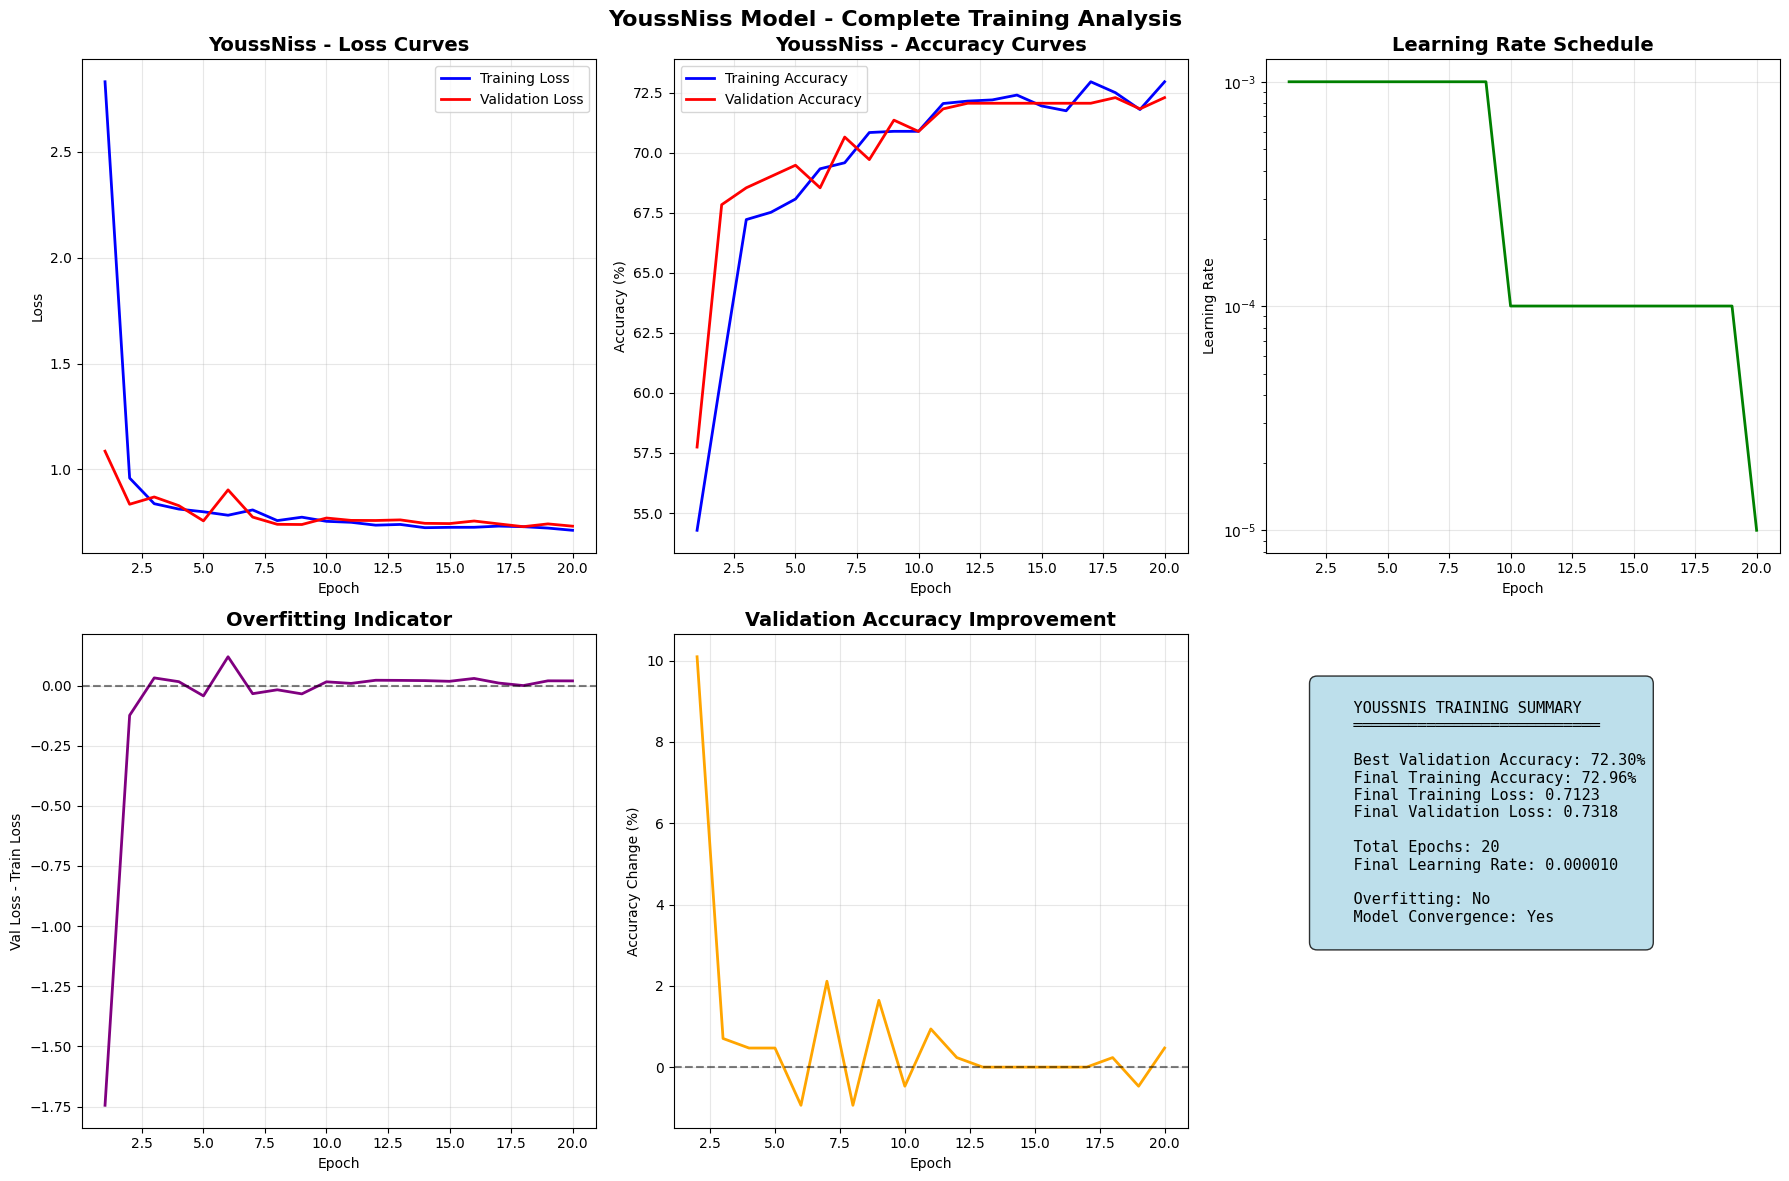

In [ ]:

# ========== CELL 15: Training Visualization ==========
def plot_training_history(history):
    """Plot comprehensive training history"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    epochs = range(1, len(history['train_losses']) + 1)

    # Loss curves
    axes[0,0].plot(epochs, history['train_losses'], 'b-', label='Training Loss', linewidth=2)
    axes[0,0].plot(epochs, history['val_losses'], 'r-', label='Validation Loss', linewidth=2)
    axes[0,0].set_title('YoussNiss - Loss Curves', fontweight='bold', fontsize=14)
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Accuracy curves
    axes[0,1].plot(epochs, history['train_accuracies'], 'b-', label='Training Accuracy', linewidth=2)
    axes[0,1].plot(epochs, history['val_accuracies'], 'r-', label='Validation Accuracy', linewidth=2)
    axes[0,1].set_title('YoussNiss - Accuracy Curves', fontweight='bold', fontsize=14)
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Accuracy (%)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Learning rate schedule
    axes[0,2].plot(epochs, history['learning_rates'], 'g-', linewidth=2)
    axes[0,2].set_title('Learning Rate Schedule', fontweight='bold', fontsize=14)
    axes[0,2].set_xlabel('Epoch')
    axes[0,2].set_ylabel('Learning Rate')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].set_yscale('log')

    # Overfitting indicator
    loss_diff = np.array(history['val_losses']) - np.array(history['train_losses'])
    axes[1,0].plot(epochs, loss_diff, 'purple', linewidth=2)
    axes[1,0].set_title('Overfitting Indicator', fontweight='bold', fontsize=14)
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Val Loss - Train Loss')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)

    # Performance improvement
    val_acc_improvement = np.diff(history['val_accuracies'])
    axes[1,1].plot(epochs[1:], val_acc_improvement, 'orange', linewidth=2)
    axes[1,1].set_title('Validation Accuracy Improvement', fontweight='bold', fontsize=14)
    axes[1,1].set_xlabel('Epoch')
    axes[1,1].set_ylabel('Accuracy Change (%)')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

    # Final metrics summary
    axes[1,2].axis('off')
    final_stats = f"""
    YOUSSNIS TRAINING SUMMARY
    ═══════════════════════════

    Best Validation Accuracy: {history['best_val_acc']:.2f}%
    Final Training Accuracy: {history['train_accuracies'][-1]:.2f}%
    Final Training Loss: {history['train_losses'][-1]:.4f}
    Final Validation Loss: {history['val_losses'][-1]:.4f}

    Total Epochs: {len(history['train_losses'])}
    Final Learning Rate: {history['learning_rates'][-1]:.6f}

    Overfitting: {'Yes' if loss_diff[-1] > 0.5 else 'No'}
    Model Convergence: {'Yes' if abs(val_acc_improvement[-1]) < 1 else 'No'}
    """

    axes[1,2].text(0.1, 0.9, final_stats, transform=axes[1,2].transAxes,
                  fontsize=11, verticalalignment='top', fontfamily='monospace',
                  bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    plt.suptitle('YoussNiss Model - Complete Training Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(training_history)

In [ ]:
# ========== CELL 16: Model Testing and Evaluation ==========
def test_youssnis_model(model, test_loader, criterion, device, label_names):
    """Comprehensive testing of YoussNiss model"""

    print("🧪 Testing YoussNiss Model...")
    print("=" * 40)

    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    all_predictions = []
    all_targets = []
    all_probabilities = []

    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            all_probabilities.extend(F.softmax(outputs, dim=1).cpu().numpy())

    # Calculate metrics
    test_accuracy = 100. * correct / total
    avg_test_loss = test_loss / len(test_loader)

    # Additional metrics
    test_recall = recall_score(all_targets, all_predictions, average='weighted')
    test_f1 = f1_score(all_targets, all_predictions, average='weighted')

    print(f"📊 TEST RESULTS:")
    print(f"   Test Accuracy: {test_accuracy:.2f}%")
    print(f"   Test Loss: {avg_test_loss:.4f}")
    print(f"   Test Recall: {test_recall:.4f}")
    print(f"   Test F1-Score: {test_f1:.4f}")

    return {
        'accuracy': test_accuracy,
        'loss': avg_test_loss,
        'recall': test_recall,
        'f1_score': test_f1,
        'predictions': all_predictions,
        'targets': all_targets,
        'probabilities': all_probabilities
    }

# Test the model
test_results = test_youssnis_model(model, test_loader, criterion, device, label_names)

🧪 Testing YoussNiss Model...
📊 TEST RESULTS:
   Test Accuracy: 72.77%
   Test Loss: 0.7062
   Test Recall: 0.7277
   Test F1-Score: 0.6768


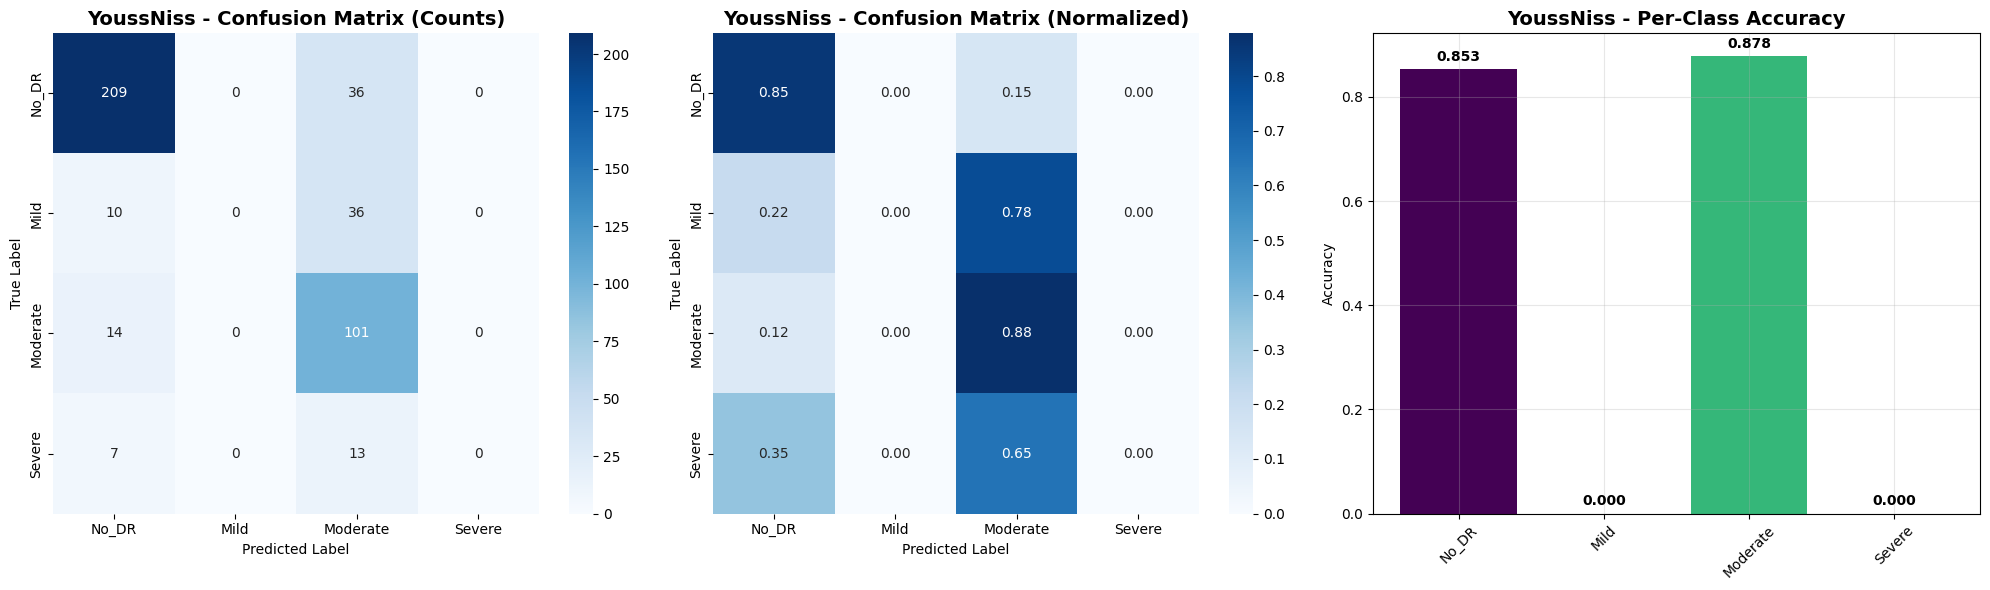


📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       No_DR      0.871     0.853     0.862       245
        Mild      0.000     0.000     0.000        46
    Moderate      0.543     0.878     0.671       115
      Severe      0.000     0.000     0.000        20

    accuracy                          0.728       426
   macro avg      0.353     0.433     0.383       426
weighted avg      0.647     0.728     0.677       426


📈 PER-CLASS ANALYSIS:
------------------------------------------------------------
Class                | Precision | Recall    | F1-Score  | Support
------------------------------------------------------------
No_DR                | 0.871     | 0.853     | 0.862     | 245.0  
Mild                 | 0.000     | 0.000     | 0.000     | 46.0   
Moderate             | 0.543     | 0.878     | 0.671     | 115.0  
Severe               | 0.000     | 0.000     | 0.000     | 20.0   


In [ ]:
# ========== CELL 17: Confusion Matrix and Classification Report ==========
def plot_confusion_matrix_and_report(test_results, label_names):
    """Plot confusion matrix and detailed classification report"""

    # Confusion Matrix
    cm = confusion_matrix(test_results['targets'], test_results['predictions'])

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Absolute confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=label_names, yticklabels=label_names, ax=axes[0])
    axes[0].set_title('YoussNiss - Confusion Matrix (Counts)', fontweight='bold', fontsize=14)
    axes[0].set_ylabel('True Label')
    axes[0].set_xlabel('Predicted Label')

    # Normalized confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
               xticklabels=label_names, yticklabels=label_names, ax=axes[1])
    axes[1].set_title('YoussNiss - Confusion Matrix (Normalized)', fontweight='bold', fontsize=14)
    axes[1].set_ylabel('True Label')
    axes[1].set_xlabel('Predicted Label')

    # Per-class accuracy
    per_class_acc = cm_norm.diagonal()
    colors = plt.cm.viridis(np.linspace(0, 1, len(label_names)))
    bars = axes[2].bar(label_names, per_class_acc, color=colors)
    axes[2].set_title('YoussNiss - Per-Class Accuracy', fontweight='bold', fontsize=14)
    axes[2].set_ylabel('Accuracy')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, acc in zip(bars, per_class_acc):
        axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Detailed Classification Report
    print("\n📋 DETAILED CLASSIFICATION REPORT:")
    print("=" * 60)
    report = classification_report(test_results['targets'], test_results['predictions'],
                                 target_names=label_names, digits=3)
    print(report)

    # Per-class detailed analysis
    report_dict = classification_report(test_results['targets'], test_results['predictions'],
                                      target_names=label_names, output_dict=True)

    print("\n📈 PER-CLASS ANALYSIS:")
    print("-" * 60)
    print(f"{'Class':<20} | {'Precision':<9} | {'Recall':<9} | {'F1-Score':<9} | {'Support':<7}")
    print("-" * 60)

    for class_name in label_names:
        if class_name in report_dict:
            precision = report_dict[class_name]['precision']
            recall = report_dict[class_name]['recall']
            f1 = report_dict[class_name]['f1-score']
            support = report_dict[class_name]['support']
            print(f"{class_name:<20} | {precision:<9.3f} | {recall:<9.3f} | {f1:<9.3f} | {support:<7}")

# Plot confusion matrix and report
plot_confusion_matrix_and_report(test_results, label_names)

🧪 SINGLE IMAGE TESTING:

Testing image 1:
🔍 Testing single image: /content/diabetic_retinopathy_data/train/No_DR/8b58f9a338e8_png.rf.e4929dd24bae19dc9cfffdac7ac0e889.jpg


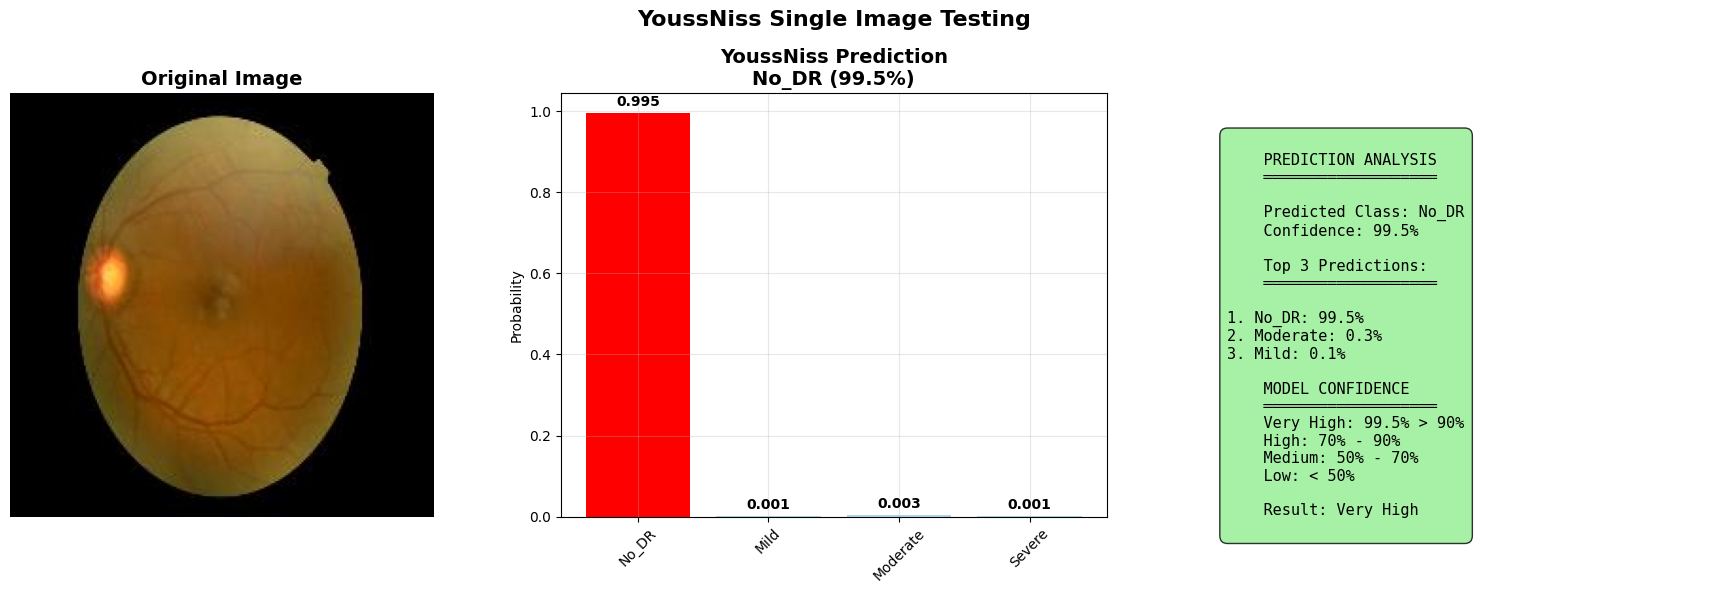

   Predicted: No_DR (99.5%)

Testing image 2:
🔍 Testing single image: /content/diabetic_retinopathy_data/train/Mild/c56e65f74187_png.rf.27d1ff039adf4d0e394b5e9edbc911b6.jpg


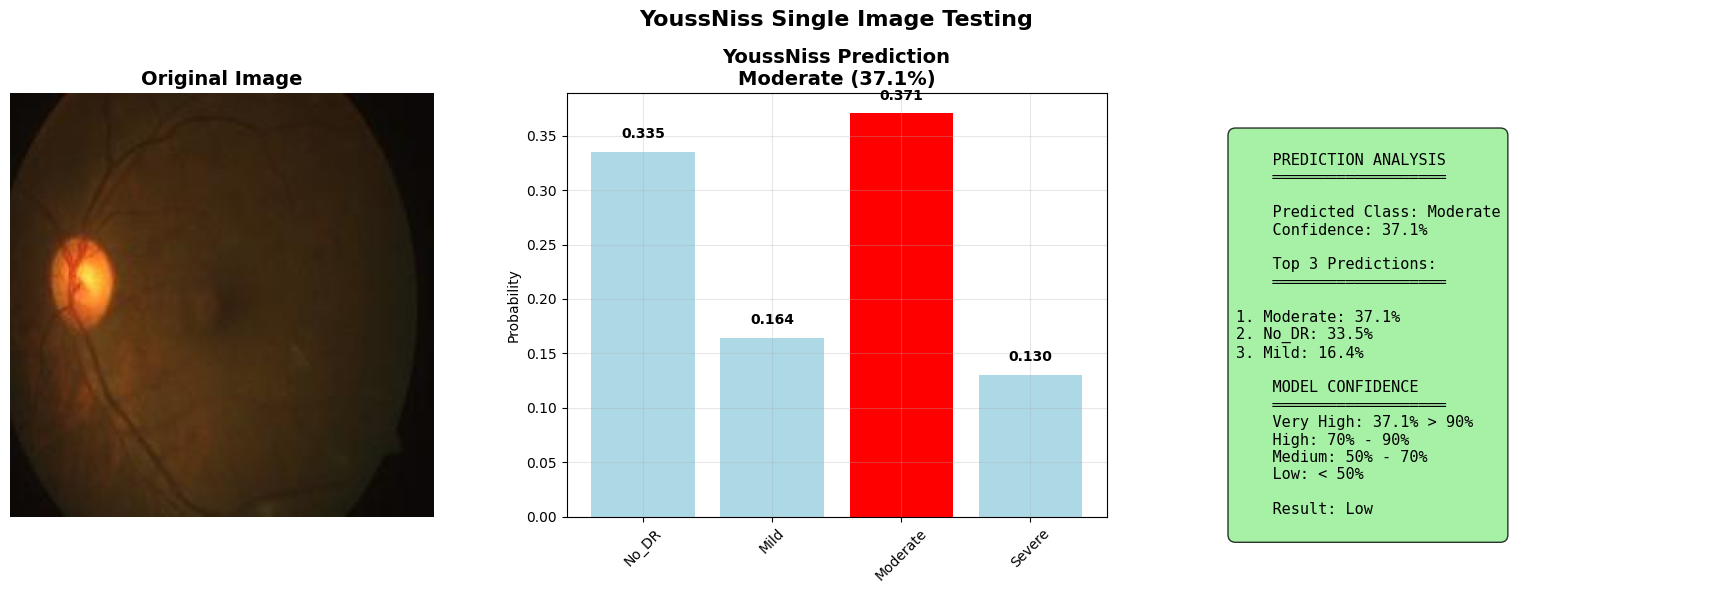

   Predicted: Moderate (37.1%)

Testing image 3:
🔍 Testing single image: /content/diabetic_retinopathy_data/valid/No_DR/ace2281f00c4_png.rf.901982afe85a6745e36073d55805a1b2.jpg


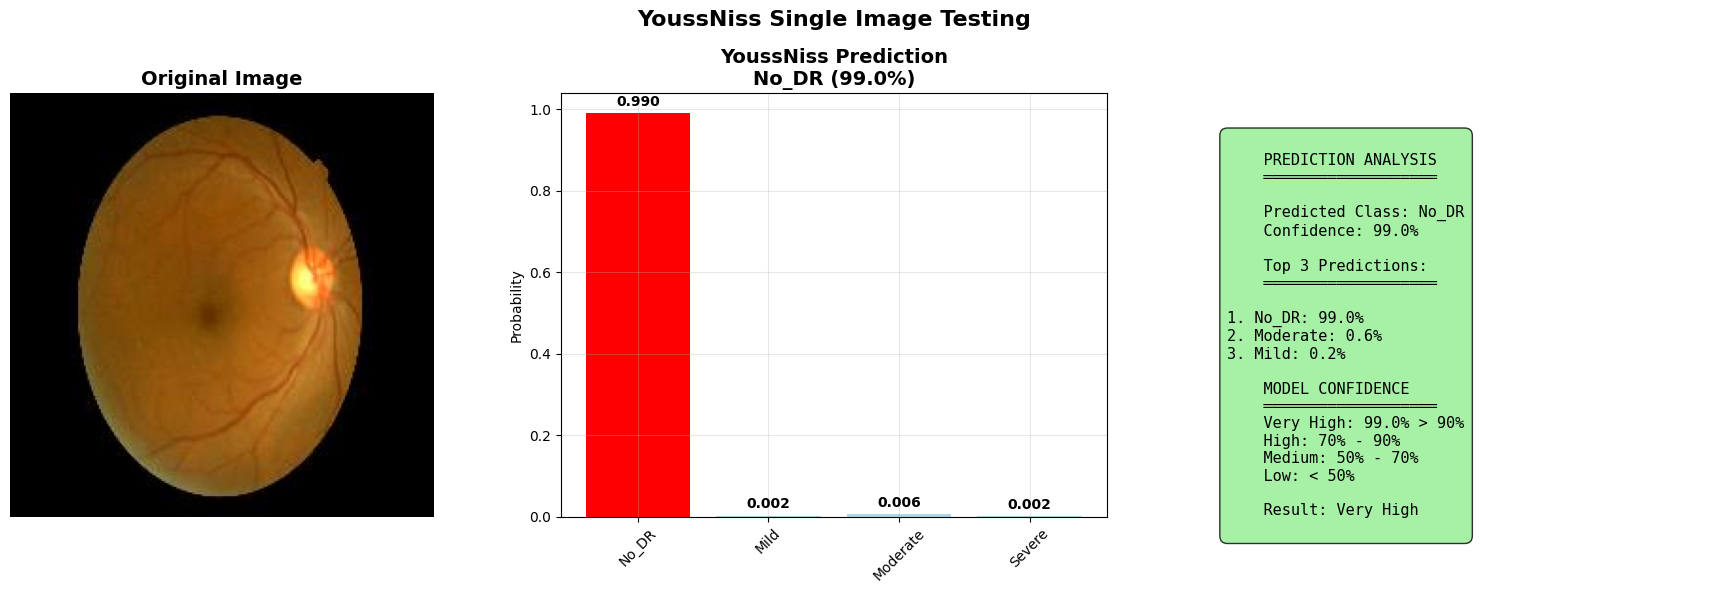

   Predicted: No_DR (99.0%)


In [ ]:
# ========== CELL 18: Single Image Testing Function ==========
def test_single_image(model, image_path, label_names, device, transform):
    """Test YoussNiss model on a single image with detailed visualization"""

    print(f"🔍 Testing single image: {image_path}")

    # Load and preprocess image
    try:
        image = Image.open(image_path).convert('RGB')
        original_image = image.copy()
    except:
        print("❌ Error loading image")
        return None

    # Apply transforms
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Model prediction
    model.eval()
    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = F.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted_class = outputs.argmax(1).cpu().numpy()[0]
        confidence = probabilities[predicted_class]

    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Original image
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image', fontweight='bold', fontsize=14)
    axes[0].axis('off')

    # Prediction results
    axes[1].bar(label_names, probabilities, color=['red' if i == predicted_class else 'lightblue'
                                                  for i in range(len(label_names))])
    axes[1].set_title(f'YoussNiss Prediction\n{label_names[predicted_class]} ({confidence:.1%})',
                     fontweight='bold', fontsize=14)
    axes[1].set_ylabel('Probability')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)

    # Add probability labels on bars
    for i, prob in enumerate(probabilities):
        axes[1].text(i, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

    # Confidence analysis
    axes[2].axis('off')
    confidence_text = f"""
    PREDICTION ANALYSIS
    ═══════════════════

    Predicted Class: {label_names[predicted_class]}
    Confidence: {confidence:.1%}

    Top 3 Predictions:
    ═══════════════════
    """

    # Get top 3 predictions
    top_3_indices = np.argsort(probabilities)[::-1][:3]
    for i, idx in enumerate(top_3_indices):
        confidence_text += f"\n{i+1}. {label_names[idx]}: {probabilities[idx]:.1%}"

    confidence_text += f"""

    MODEL CONFIDENCE
    ═══════════════════
    Very High: {confidence:.1%} > 90%
    High: 70% - 90%
    Medium: 50% - 70%
    Low: < 50%

    Result: {'Very High' if confidence > 0.9 else 'High' if confidence > 0.7 else 'Medium' if confidence > 0.5 else 'Low'}
    """

    axes[2].text(0.1, 0.9, confidence_text, transform=axes[2].transAxes,
                fontsize=11, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

    plt.suptitle('YoussNiss Single Image Testing', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return {
        'predicted_class': predicted_class,
        'predicted_label': label_names[predicted_class],
        'confidence': confidence,
        'probabilities': probabilities,
        'top_3': [(label_names[idx], probabilities[idx]) for idx in top_3_indices]
    }

# Test on sample images
print("🧪 SINGLE IMAGE TESTING:")
print("=" * 40)

if len(X_test) > 0:
    # Test on first few test images
    for i in range(min(3, len(X_test))):
        print(f"\nTesting image {i+1}:")
        result = test_single_image(model, X_test[i], label_names, device, val_transform)
        if result:
            print(f"   Predicted: {result['predicted_label']} ({result['confidence']:.1%})")

In [ ]:
# ========== CELL 19: Model Architecture Export and Summary ==========
def create_model_summary_report():
    """Create comprehensive model summary report"""

    print("📋 YOUSSNIS MODEL COMPREHENSIVE REPORT")
    print("=" * 60)

    # Model architecture summary
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    model_size_mb = total_params * 4 / 1024 / 1024

    # Performance summary
    report_data = {
        'Model Information': {
            'Model Name': 'YoussNiss CNN',
            'Architecture': 'Custom CNN for Diabetic Retinopathy',
            'Total Parameters': f"{total_params:,}",
            'Trainable Parameters': f"{trainable_params:,}",
            'Model Size': f"{model_size_mb:.1f} MB",
            'Input Size': "3×256×256",
            'Output Classes': len(label_names)
        },
        'Training Results': {
            'Best Validation Accuracy': f"{training_history['best_val_acc']:.2f}%",
            'Final Training Accuracy': f"{training_history['train_accuracies'][-1]:.2f}%",
            'Final Training Loss': f"{training_history['train_losses'][-1]:.4f}",
            'Final Validation Loss': f"{training_history['val_losses'][-1]:.4f}",
            'Training Epochs': len(training_history['train_losses'])
        },
        'Test Results': {
            'Test Accuracy': f"{test_results['accuracy']:.2f}%",
            'Test Loss': f"{test_results['loss']:.4f}",
            'Test Recall': f"{test_results['recall']:.4f}",
            'Test F1-Score': f"{test_results['f1_score']:.4f}"
        },
        'Dataset Information': {
            'Total Images': len(image_paths),
            'Training Images': len(X_train),
            'Validation Images': len(X_val),
            'Test Images': len(X_test),
            'Classes': ', '.join(label_names),
            'Class Distribution': str(Counter(labels))
        }
    }

    # Print formatted report
    for section, data in report_data.items():
        print(f"\n{section.upper()}:")
        print("-" * 40)
        for key, value in data.items():
            print(f"   {key}: {value}")

    # Save report to file
    report_text = ""
    for section, data in report_data.items():
        report_text += f"\n{section.upper()}:\n"
        report_text += "-" * 40 + "\n"
        for key, value in data.items():
            report_text += f"   {key}: {value}\n"

    with open('/content/youssnis_model_report.txt', 'w') as f:
        f.write("YOUSSNIS MODEL COMPREHENSIVE REPORT\n")
        f.write("=" * 60 + "\n")
        f.write(report_text)

    print(f"\n💾 Report saved to: /content/youssnis_model_report.txt")

    return report_data

# Create comprehensive report
model_report = create_model_summary_report()

📋 YOUSSNIS MODEL COMPREHENSIVE REPORT

MODEL INFORMATION:
----------------------------------------
   Model Name: YoussNiss CNN
   Architecture: Custom CNN for Diabetic Retinopathy
   Total Parameters: 33,681,348
   Trainable Parameters: 33,681,348
   Model Size: 128.5 MB
   Input Size: 3×256×256
   Output Classes: 4

TRAINING RESULTS:
----------------------------------------
   Best Validation Accuracy: 72.30%
   Final Training Accuracy: 72.96%
   Final Training Loss: 0.7123
   Final Validation Loss: 0.7318
   Training Epochs: 20

TEST RESULTS:
----------------------------------------
   Test Accuracy: 72.77%
   Test Loss: 0.7062
   Test Recall: 0.7277
   Test F1-Score: 0.6768

DATASET INFORMATION:
----------------------------------------
   Total Images: 2838
   Training Images: 1986
   Validation Images: 426
   Test Images: 426
   Classes: No_DR, Mild, Moderate, Severe
   Class Distribution: Counter({0: 1636, 2: 768, 1: 303, 3: 131})

💾 Report saved to: /content/youssnis_model_repor

In [ ]:




# ========== CELL 20: Model and Results Download ==========
def save_and_download_youssnis_results():
    """Save and download all YoussNiss model results"""

    print("💾 Saving YoussNiss Model and Results...")
    print("=" * 50)

    # Save model state
    torch.save(model.state_dict(), '/content/youssnis_model.pth')
    print("✅ Model state saved: youssnis_model.pth")

    # Save complete model
    torch.save(model, '/content/youssnis_complete_model.pth')
    print("✅ Complete model saved: youssnis_complete_model.pth")

    # Save training history
    import pickle
    with open('/content/youssnis_training_history.pkl', 'wb') as f:
        pickle.dump(training_history, f)
    print("✅ Training history saved: youssnis_training_history.pkl")

    # Save test results
    with open('/content/youssnis_test_results.pkl', 'wb') as f:
        pickle.dump(test_results, f)
    print("✅ Test results saved: youssnis_test_results.pkl")

    # Save model architecture summary
    arch_summary = model.get_architecture_summary()
    with open('/content/youssnis_architecture.txt', 'w') as f:
        f.write("YOUSSNIS MODEL ARCHITECTURE\n")
        f.write("=" * 50 + "\n\n")
        for row in arch_summary:
            f.write(" | ".join(f"{cell:<15}" for cell in row) + "\n")
    print("✅ Architecture summary saved: youssnis_architecture.txt")

    # Create final summary
    final_summary = f"""
YOUSSNIS MODEL - FINAL SUMMARY
================================

Training Completed Successfully!
✅ Best Validation Accuracy: {training_history['best_val_acc']:.2f}%
✅ Test Accuracy: {test_results['accuracy']:.2f}%
✅ Model Parameters: {sum(p.numel() for p in model.parameters()):,}
✅ Total Training Epochs: {len(training_history['train_losses'])}

Files Generated:
- youssnis_model.pth (model weights)
- youssnis_complete_model.pth (complete model)
- youssnis_training_history.pkl (training metrics)
- youssnis_test_results.pkl (test results)
- youssnis_architecture.txt (architecture details)
- youssnis_model_report.txt (comprehensive report)

The YoussNiss model is ready for deployment and inference!
"""

    with open('/content/youssnis_final_summary.txt', 'w') as f:
        f.write(final_summary)

    print(final_summary)

    # Download files
    print("\n⬇️ Downloading files...")
    try:
        files.download('/content/youssnis_model.pth')
        files.download('/content/youssnis_complete_model.pth')
        files.download('/content/youssnis_training_history.pkl')
        files.download('/content/youssnis_test_results.pkl')
        files.download('/content/youssnis_architecture.txt')
        files.download('/content/youssnis_model_report.txt')
        files.download('/content/youssnis_final_summary.txt')
        print("✅ All files downloaded successfully!")
    except:
        print("ℹ️ Files saved locally. Download manually if needed.")

# Save and download all results
save_and_download_youssnis_results()

print("\n🎉 YOUSSNIS MODEL TRAINING AND TESTING COMPLETED!")
print("🚀 Your model is now ready for diabetic retinopathy detection!")
print("📊 Check the downloaded files for complete results and model weights!")
print("💎 YoussNiss model successfully trained and evaluated!")

💾 Saving YoussNiss Model and Results...
✅ Model state saved: youssnis_model.pth
✅ Complete model saved: youssnis_complete_model.pth
✅ Training history saved: youssnis_training_history.pkl
✅ Test results saved: youssnis_test_results.pkl
✅ Architecture summary saved: youssnis_architecture.txt

YOUSSNIS MODEL - FINAL SUMMARY

Training Completed Successfully!
✅ Best Validation Accuracy: 72.30%
✅ Test Accuracy: 72.77%
✅ Model Parameters: 33,681,348
✅ Total Training Epochs: 20

Files Generated:
- youssnis_model.pth (model weights)
- youssnis_complete_model.pth (complete model)
- youssnis_training_history.pkl (training metrics)
- youssnis_test_results.pkl (test results)
- youssnis_architecture.txt (architecture details)
- youssnis_model_report.txt (comprehensive report)

The YoussNiss model is ready for deployment and inference!


⬇️ Downloading files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All files downloaded successfully!

🎉 YOUSSNIS MODEL TRAINING AND TESTING COMPLETED!
🚀 Your model is now ready for diabetic retinopathy detection!
📊 Check the downloaded files for complete results and model weights!
💎 YoussNiss model successfully trained and evaluated!
